In [1]:
import sys; sys.path.append("../../../utility_scripts/")
from dotplot_utils import *
import pandas as pd
import seaborn as sns
# make this notebook work better with Scanpy
import warnings; warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import catheat
import matplotlib.pyplot as plt

In [3]:
sc.set_figure_params(transparent=True, dpi_save=400)
sc.settings.figdir = "plots_patient/"

---
## Read in key dataframe with sample information

In [4]:
sample_key_orig = pd.read_csv("../../resources/visium_sample_key.csv", index_col=0)
sample_key_orig["block_type"] = sample_key_orig.block_name + "_" + sample_key_orig.tumor_type
tmp = pd.DataFrame(sample_key_orig.block_type.value_counts())
tmp.columns = ["# Visium"]
sample_key = sample_key_orig.merge(tmp, left_on="block_type", right_index=True, how="left")
sample_key = sample_key.drop_duplicates("block_type")

In [5]:
cnv_scores = pd.read_csv("../../resources/cnv_score_per_patient.csv", index_col=0)

In [6]:
muts = pd.read_csv("../exome_genome/resources/pseudobulk_variants_per_sample.csv")
muts = muts.merge(sample_key[["patient_name","block_name"]], left_on="Tumor_Sample_Barcode", right_on="patient_name", how="left")
muts.block_name = muts.block_name.fillna(muts.Tumor_Sample_Barcode)
muts = muts.loc[~((muts.patient_name=="PAT71397")&(muts.block_name=="WD86055"))].reset_index().copy()

In [7]:
crc_muts = pd.read_csv("../exome_genome/resources/CRC_mutations_pseudobulk.csv", index_col=0)
crc_muts.columns = [x + " Mut." for x in crc_muts.columns]
crc_muts = crc_muts.reset_index()
crc_muts = crc_muts.merge(sample_key[["patient_name","block_name"]], left_on="index", right_on="patient_name", how="left")
crc_muts.block_name = crc_muts.block_name.fillna(crc_muts["index"])
crc_muts = crc_muts.loc[~((crc_muts.patient_name=="PAT71397")&(crc_muts.block_name=="WD86055"))].reset_index().copy()

In [8]:
sample_key = sample_key.merge(cnv_scores, left_on="patient_name", right_index=True, how="left")
sample_key = sample_key.reset_index().merge(muts[["block_name","Variants"]], left_on="block_name", right_on="block_name", how="left").set_index("index")
sample_key = sample_key.reset_index().merge(crc_muts[["block_name","APC Mut.","KRAS Mut.","TP53 Mut.","BRAF Mut."]], left_on="block_name", right_on="block_name", how="left").set_index("index")
sample_key.loc[sample_key.block_name=="WD86055", "Variants"] = muts.loc[muts.Tumor_Sample_Barcode=="WD86055","Variants"].values[0]

In [9]:
sample_key.Variants = sample_key.Variants.fillna(0)

In [10]:
sample_key.loc[sample_key.block_name=="WD86055", "CNV score"] = 0.031962

In [11]:
sample_key.rename(columns={"CNV score":"CNV score (bulk)"}, inplace=True)
sample_key

sample_key sample_key_short     block_name  \
index                                                              
8578_4_SR00001         8578_AS_4           8578_4        SR00001   
7319_4_HTA11_01938     7319_AS_4           7319_4    HTA11_01938   
8270_1_HTA11_07862     8270_AS_1           8270_1    HTA11_07862   
8270_2_HTA11_10711     8270_AS_2           8270_2    HTA11_10711   
6723_4_WD86055         6723_KL_4           6723_4        WD86055   
7794_2_WD33468         7794_AS_2           7794_2        WD33468   
8578_1_WD33469         8578_AS_1           8578_1        WD33469   
8578_1_WD33473         8578_AS_1           8578_1        WD33473   
8270_6_WD84602         8270_AS_6           8270_6        WD84602   
8270_9_WD84594         8270_AS_9           8270_9        WD84594   
8270_8_WD84596         8270_AS_8           8270_8        WD84596   
6723_1_WD86056         6723_KL_1           6723_1        WD86056   
7003_5_WD87480         7003_AS_5           7003_5        WD87480   
7003_7_WD87482         7003_AS_7           7003_7        WD87482   
7003_1_WD87478         7003_AS_1           7003_1        WD87478   
8899_5_SG00003         8899_AS_5           8899_5        SG00003   
8899_7_SG00004         8899_AS_7           8899_7        SG00004   
8270_5_HTA11_06134     8270_AS_5           8270_5    HTA11_06134   
8270_3_HTA11_07663     8270_AS_3           8270_3    HTA11_07663   
7319_2_HTA11_08622_A   7319_AS_2           7319_2  HTA11_08622_A   
7319_3_HTA11_08622_B   7319_AS_3           7319_3  HTA11_08622_B   
7794_1_WD33476         7794_AS_1           7794_1        WD33476   
8578_1_WD33474         8578_AS_1           8578_1        WD33474   
7794_2_WD33475         7794_AS_2           7794_2        WD33475   
7794_3_WD84221         7794_AS_3           7794_3        WD84221   
7794_1_WD33479         7794_AS_1           7794_1        WD33479   
8270_11_WD84216       8270_AS_11          8270_11        WD84216   
8270_10_WD84226       8270_AS_10          8270_10        WD84226   
7003_3_WD85806         7003_AS_3           7003_3        WD85806   
8899_1_SG00001         8899_AS_1           8899_1        SG00001   
8899_3_SG00002         8899_AS_3           8899_3        SG00002   

                       patient_name tumor_type        tumor_loc gender  \
index                                                                    
8578_4_SR00001              SR00001         NL              NaN    NaN   
7319_4_HTA11_01938      HTA11_01938     TA/TVA            Cecum      F   
8270_1_HTA11_07862      HTA11_07862     TA/TVA          Sigmoid      M   
8270_2_HTA11_10711      HTA11_10711     TA/TVA            Cecum      F   
6723_4_WD86055             PAT71397     TA/TVA            Cecum      M   
7794_2_WD33468             PAT05785        MSS          Sigmoid      M   
8578_1_WD33469             PAT06439        MSS            Cecum      M   
8578_1_WD33473             PAT15211        MSS          Sigmoid      M   
8270_6_WD84602             PAT30884        MSS          Sigmoid      F   
8270_9_WD84594             PAT59600        MSS       Transverse      M   
8270_8_WD84596             PAT59667        MSS            Cecum      F   
6723_1_WD86056             PAT71397        MSS            Cecum      M   
7003_5_WD87480             PAT71662        MSS          Sigmoid      M   
7003_7_WD87482             PAT73899        MSS          Sigmoid      F   
7003_1_WD87478             PAT74143        MSS       Descending      M   
8899_5_SG00003              SG00003        MSS            Cecum      F   
8899_7_SG00004              SG00004        MSS       Transverse      F   
8270_5_HTA11_06134      HTA11_06134     SSL/HP          Sigmoid      M   
8270_3_HTA11_07663      HTA11_07663     SSL/HP            Cecum      M   
7319_2_HTA11_08622_A  HTA11_08622_A     SSL/HP        Ascending      F   
7319_3_HTA11_08622_B  HTA11_08622_B     SSL/HP  Hepatic Flexure      F   
7794_1_WD33476             PAT00222      MSI-H            Cecum      M   
8

In [12]:
sample_key["CNV score (bulk)"].max()

0.0814034692763329

In [13]:
sample_key["CNV score (bulk)"].min()

0.0129960800286425

In [14]:
sample_key["Variants"].max()

6804.0

In [15]:
sample_key["Variants"].min()

0.0

---
## Define pseudotime ordering by `LCM_ROI`

In [31]:
muts = pd.read_csv("../exome_genome/resources/LCM_variants_per_sample.csv", index_col=0)
mapper = {
    "WD86055_ROI4":"WD86055_ROI1",
    "WD86055_ROI2":"WD86055_ROI2",
    "WD86055_ROI3":"WD86055_ROI3",
    "WD86055_ROI1":"WD86055_ROI4",
    "WD86056_ROI2":"WD86055_ROI5",
    "WD86056_ROI1":"WD86055_ROI6",
    "WD86056_ROI4":"WD86055_ROI7",
    "WD86056_ROI3":"WD86055_ROI8",
    "WD33475_ROI4":"WD33475_ROI3",
    "WD33475_ROI5":"WD33475_ROI4",
}
muts.Tumor_Sample_Barcode.replace(mapper, inplace=True)
muts["Tumor_Sample_Barcode"] = [sample_key.loc[sample_key.block_name==x.split("_")[0],"patient_name"][0] + "_" + x.split("_")[1] for x in muts["Tumor_Sample_Barcode"]]
muts[["Patient", "ROI"]] = muts["Tumor_Sample_Barcode"].str.split("_", expand=True)

In [32]:
muts = muts.merge(sample_key.loc[sample_key.tumor_type.isin(["MSS","MSI-H"]),["patient_name","tumor_type"]], left_on="Patient", right_on="patient_name", how="left").drop_duplicates()
muts = muts.drop(columns=["patient_name"])

In [33]:
muts

Tumor_Sample_Barcode  Variants   Patient   ROI tumor_type
0         PAT15211_ROI2      5303  PAT15211  ROI2        MSS
1         PAT15211_ROI3      4830  PAT15211  ROI3        MSS
2          SG00001_ROI2      2139   SG00001  ROI2      MSI-H
3         PAT00222_ROI1      2111  PAT00222  ROI1      MSI-H
4         PAT00222_ROI3      2075  PAT00222  ROI3      MSI-H
..                  ...       ...       ...   ...        ...
79        PAT06439_ROI2        25  PAT06439  ROI2        MSS
80         SG00001_ROI3        20   SG00001  ROI3      MSI-H
81        PAT40364_ROI5        12  PAT40364  ROI5      MSI-H
82        PAT40364_ROI3        11  PAT40364  ROI3      MSI-H
83         SG00002_ROI3        11   SG00002  ROI3      MSI-H

[84 rows x 5 columns]

In [34]:
pt_orders = {}

muts_MSS = muts.loc[muts.tumor_type=="MSS",:].copy()
muts_MSS.Patient = muts_MSS.Patient.astype("category")
for pat in muts_MSS.Patient.cat.categories:
    pt_orders[pat] = list(muts.loc[muts.Patient==pat, "ROI"])[::-1]
    
muts_MSI = muts.loc[muts.tumor_type=="MSI-H",:].copy()
muts_MSI.Patient = muts_MSI.Patient.astype("category")
for pat in muts_MSI.Patient.cat.categories:
    pt_orders[pat] = list(muts.loc[muts.Patient==pat, "ROI"])[::-1]

In [35]:
muts2 = pd.read_csv("../exome_genome/resources/pseudobulk_variants_per_sample.csv")

In [36]:
muts2

Tumor_Sample_Barcode  Variants
0              PAT15211      6804
1               SG00001      3975
2               SG00002      3270
3           HTA11_01938      2805
4               SG00003      2796
5              PAT00222      2613
6              PAT73458      2431
7              PAT40364      2210
8              PAT01586      1907
9              PAT54273      1470
10             PAT05785      1323
11             PAT71397      1188
12             PAT71662      1084
13          HTA11_06134      1042
14             PAT74143      1006
15             PAT33430      1002
16             PAT73899       671
17          HTA11_10711       572
18             PAT59460       519
19              SG00004       352
20        HTA11_08622_A       328
21             PAT01587       293
22             PAT30884       261
23          HTA11_07663       251
24             PAT59667       130
25              WD86055       113
26             PAT59600       101
27             PAT06439        85
28          HTA11_07862        72
29        HTA11_08622_B        54

---

In [37]:
outs = []
names = []
for s in sample_key_orig.index:
    a = sc.read("datasets/{}_master.h5ad".format(s))
    print("Read adata from datasets/{}_master.h5ad".format(s))
    
    if "Variants" in a.obs.columns:
        a.obs.drop(columns="Variants", inplace=True)
    
    if "LCM_ROI" in a.obs.columns:
        # filter to LCM ROIs
        a.obs.LCM_ROI = a.obs.LCM_ROI.astype(str)
        a = a[a.obs.LCM_ROI.str.contains("ROI"), :].copy()
        print("Filtered to {} spots within LCM ROIs".format(a.n_obs))
        
        # add number of detected Variants
        a.obs = a.obs.reset_index().merge(muts[["Patient","ROI","Variants"]], left_on=["Patient","LCM_ROI"], right_on=["Patient","ROI"], how="left").drop(columns="ROI").set_index("index")
        
        # create CNV_LCM intersection
        a.obs["CNV_LCM"] = ""
        for ROI in a.obs.LCM_ROI.unique():
            print("{}: ".format(ROI), end = "")
            try:
                if a.obs.loc[(a.obs.LCM_ROI==ROI)&(~a.obs["CNV clone"].isin(["S","E"])), "CNV clone"].value_counts().max() < 20:
                    print("No dominant clone!")
                else:
                    dom_clone = a.obs.loc[(a.obs.LCM_ROI==ROI)&(~a.obs["CNV clone"].isin(["S","E"])), "CNV clone"].value_counts().index[a.obs.loc[(a.obs.LCM_ROI==ROI)&(~a.obs["CNV clone"].isin(["S","E"])), "CNV clone"].value_counts().argmax()]
                    print("Dominant clone = {}".format(dom_clone))
                    a.obs.loc[(a.obs.LCM_ROI==ROI)&(a.obs["CNV clone"].isin([dom_clone, "E"])), "CNV_LCM"] = sample_key_orig.loc[s, "patient_name"] + " " + ROI + " " + dom_clone
            except:
                print("No dominant clone!")
                
        a = a[a.obs.CNV_LCM != "", :].copy()
        print("Filtered to {} spots within CNV clones".format(a.n_obs))
        
        # compile training data
        outs.append(a)
        names.append(s)
        
    elif s == "8270_12_WD84216":
            print("Skipping 8270_12_WD84216")
    else:
        print("No LCM variants found")
        try:
            a.obs["Variants"] = muts2.loc[muts2.Tumor_Sample_Barcode==sample_key_orig.loc[s,:].block_name,"Variants"].values[0]
            print("Using bulk WES variants")
            a = a[~a.obs["CNV clone"].isin(["S","E"]), :].copy()
            print("Filtered to {} spots within CNV clones".format(a.n_obs))
            
            # create CNV_LCM intersection
            a.obs["LCM_ROI"] = sample_key_orig.loc[s, "patient_name"]
            a.obs["CNV_LCM"] = a.obs.Patient.astype(str) + " " + a.obs["CNV clone"].astype(str)
            
            # compile training data
            outs.append(a)
            names.append(s)
            
        except:
            print("No bulk variants found")
            a.obs["Variants"] = 0
            
            #find most abundant clone and set "E" to that
            dom_clone = a.obs.loc[~a.obs["CNV clone"].isin(["S","E"]), "CNV clone"].value_counts().index[a.obs.loc[~a.obs["CNV clone"].isin(["S","E"]), "CNV clone"].value_counts().argmax()]
            print("Dominant clone = {}".format(dom_clone))
            a.obs.loc[a.obs["CNV clone"]=="E", "CNV clone"] = dom_clone
            
            # subset to epithelium
            a = a[a.obs["CNV clone"]!="S", :].copy()
            print("Filtered to {} spots within CNV clones".format(a.n_obs))
            
            # create CNV_LCM intersection
            a.obs["LCM_ROI"] = sample_key_orig.loc[s, "patient_name"]
            a.obs["CNV_LCM"] = a.obs.Patient.astype(str) + " " + a.obs["CNV clone"].astype(str)
            
            # compile training data
            outs.append(a)
            names.append(s)
            
    print("\n")

Read adata from datasets/8578_4_SR00001_master.h5ad
No LCM variants found
No bulk variants found
Dominant clone = 1
Filtered to 1067 spots within CNV clones


Read adata from datasets/7319_4_HTA11_01938_master.h5ad
No LCM variants found
Using bulk WES variants
Filtered to 571 spots within CNV clones


Read adata from datasets/8270_1_HTA11_07862_master.h5ad
No LCM variants found
Using bulk WES variants
Filtered to 191 spots within CNV clones


Read adata from datasets/8270_2_HTA11_10711_master.h5ad
No LCM variants found
Using bulk WES variants
Filtered to 84 spots within CNV clones


Read adata from datasets/6723_4_WD86055_master.h5ad
Filtered to 2100 spots within LCM ROIs
ROI2: Dominant clone = 1
ROI4: Dominant clone = 1
Filtered to 515 spots within CNV clones


Read adata from datasets/7794_2_WD33468_master.h5ad
Filtered to 494 spots within LCM ROIs
ROI1: No dominant clone!
ROI3: Dominant clone = 1A
ROI4: No dominant clone!
ROI2: Dominant clone = 1B
Filtered to 123 spots within CNV cl

In [38]:
# concatenate anndata objects
a_comb = outs[0].concatenate(
    outs[1:],
    join="outer",
    batch_categories=names,
    fill_value=0,
)
del a_comb.var
del a_comb.obsm
a_comb  # view object

/home/cody/.virtualenvs/scanpy/lib/python3.8/site-packages/anndata/_core/merge.py:863: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  concat_annot[label] = label_col
/home/cody/.virtualenvs/scanpy/lib/python3.8/site-packages/anndata/_core/merge.py:863: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  concat_annot[label] = label_col


AnnData object with n_obs × n_vars = 29221 × 19469
    obs: 'in_tissue', 'array_row', 'array_col', 'Sample', 'Patient', 'Block ID', 'Tumor Type', 'Tumor Location', 'Gender', 'Ethnicity', 'pathology_annotation', 'CytoTRACE', 'A1_Innate', 'A2_Cytotoxic', 'A3_Endocrine', 'A4_MUC', 'A5_ABS', 'A6_SM', 'A7_Adaptive', 'A8_Stem', 'Tumor Stage', 'Tumor Grade', 'cnv_leiden', 'CNV score', 'CNV clone', 'Cytotoxicity', 'Exhaustion', 'Cytokines', 'Chemokines', 'MHC', 'Fetal', 'Stem', 'Metaplasia', 'Bacterial response', 'iCMS2_Up', 'iCMS2_Down', 'iCMS3_Up', 'iCMS3_Down', 'Proliferation', 'Translation', 'Neutrophils', 'RSC', 'CBC', 'T cell exhaustion', 'B cell', 'NK cell', 'Plasma cell', 'T reg resting', 'T reg suppressive', 'T reg tissue homing', 'T reg cytokines', 'T reg activation', 'TH1', 'TH2', 'TH17', 'TRM', 'M1', 'M2', 'Costimulatory MYE', 'Stimulatory DCs', 'IFN stimulated MYE', 'EMT', 'Senescence', 'SASP', 'IFN stimulated EPI', 'Stress response', 'Fibrosis', 'T cell', 'Myeloid', 'Stroma', 'T 

#### Adjust 'Variants' to 'TMB' for plotting

In [39]:
a_comb.obs.rename(columns={"Variants":"TMB"}, inplace=True)

---
## Rename things and set up for plotting

In [40]:
# rename obs columns with MxIF stains in them
old_mxif = list(a_comb.obs.columns[a_comb.obs.columns.str.endswith("_MxIF")])
new_mxif = list(a_comb.obs.columns[a_comb.obs.columns.str.endswith("_MxIF")].str.split("_").str[0])
a_comb.obs.rename(columns=dict(zip(old_mxif,new_mxif)), inplace=True)

In [41]:
# rename cell state columns in master anndata.obs
et = list(a_comb.obs.columns[a_comb.obs.columns.str.endswith("_VUMCrefNMF30")])
et_new = [x.replace("_VUMCrefNMF30", "") for x in et]
a_comb.obs.rename(columns=dict(zip(et, et_new)), inplace=True)

In [42]:
a_comb

AnnData object with n_obs × n_vars = 29221 × 19469
    obs: 'in_tissue', 'array_row', 'array_col', 'Sample', 'Patient', 'Block ID', 'Tumor Type', 'Tumor Location', 'Gender', 'Ethnicity', 'pathology_annotation', 'CytoTRACE', 'A1_Innate', 'A2_Cytotoxic', 'A3_Endocrine', 'A4_MUC', 'A5_ABS', 'A6_SM', 'A7_Adaptive', 'A8_Stem', 'Tumor Stage', 'Tumor Grade', 'cnv_leiden', 'CNV score', 'CNV clone', 'Cytotoxicity', 'Exhaustion', 'Cytokines', 'Chemokines', 'MHC', 'Fetal', 'Stem', 'Metaplasia', 'Bacterial response', 'iCMS2_Up', 'iCMS2_Down', 'iCMS3_Up', 'iCMS3_Down', 'Proliferation', 'Translation', 'Neutrophils', 'RSC', 'CBC', 'T cell exhaustion', 'B cell', 'NK cell', 'Plasma cell', 'T reg resting', 'T reg suppressive', 'T reg tissue homing', 'T reg cytokines', 'T reg activation', 'TH1', 'TH2', 'TH17', 'TRM', 'M1', 'M2', 'Costimulatory MYE', 'Stimulatory DCs', 'IFN stimulated MYE', 'EMT', 'Senescence', 'SASP', 'IFN stimulated EPI', 'Stress response', 'Fibrosis', 'T cell', 'Myeloid', 'Stroma', 'T 

In [43]:
cmap_dict = {
    # Tumor Type
    'SSL/HP':"#c4a4e1",'MSI-H':"#7a4fa3",'MSS':"#ffc101",'TA/TVA':"#fee799",'NL':"#1f77b4",
    # Tumor Location
    "Cecum":"#62a32e","Ascending":"#b0dc7d","Hepatic Flexure":"#ebf6db","Transverse":"#fbe6f1","Descending":"#eeadd4","Sigmoid":"#cf4191",
    # this one's global
    "nan":"#ffffff",
    # These are black and white for T and F
    "T":"#000000","F":"#ffffff",
    # evolution
    "N":"tab:blue","B":"tab:green","L":"tab:orange",
    # CNV clone domain
    "T":"#000000","S":"tab:pink","E":"tab:red"
}
stage_colordict = dict(zip(["AD","I","II","III/IV"], sns.color_palette("Reds", len(["AD","I","II","III/IV"])).as_hex()))
grade_colordict = dict(zip(["G1","G2","G3"], sns.color_palette("Reds", len(["G1","G2","G3"])).as_hex()))
cmap_dict = {**cmap_dict, **stage_colordict, **grade_colordict}

In [44]:
patient_colordict = dict(zip(sample_key.patient_name, [cmap_dict[x] for x in sample_key.tumor_type]))

In [45]:
import matplotlib

In [46]:
cmap = matplotlib.cm.get_cmap("plasma", 8)
mw_colordict = dict(zip(["D0","D1","D2","D3","D4","D5","D6","D7"], [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]))

---
# LCM_ROI - CNV Clone intersection ordering

In [33]:
CIN_PATs = sample_key.loc[(sample_key["CIN Status"].isin(["CIN+","NL","TA/TVA"]))&(sample_key.patient_name!='HTA11_01938'),"patient_name"].unique()

In [34]:
CIN_PATs

array(['SR00001', 'HTA11_07862', 'HTA11_10711', 'PAT71397', 'PAT05785',
       'PAT06439', 'PAT30884', 'PAT59600', 'PAT59667', 'PAT71662',
       'PAT73899', 'PAT74143', 'SG00003', 'SG00004', 'PAT73458',
       'SG00001', 'SG00002'], dtype=object)

In [35]:
HM_PATs = sample_key.loc[sample_key["CIN Status"].isin(["HM","SSL/HP"]),"patient_name"].unique()

In [36]:
HM_PATs

array(['PAT15211', 'HTA11_06134', 'HTA11_07663', 'HTA11_08622_A',
       'HTA11_08622_B', 'PAT00222', 'PAT01586', 'PAT01587', 'PAT33430',
       'PAT40364', 'PAT54273', 'PAT59460'], dtype=object)

In [37]:
AD_CIN_adata = a_comb[a_comb.obs["Patient"].isin(list(CIN_PATs)), :].copy()
AD_CIN = AD_CIN_adata.obs.groupby(["CNV_LCM"]).mean().sort_values(["CNV score"], ascending=[True]).reset_index()

SER_HM_adata = a_comb[a_comb.obs["Patient"].isin(list(HM_PATs)), :].copy()
SER_HM = SER_HM_adata.obs.groupby(["CNV_LCM"]).mean().sort_values(["TMB"], ascending=[True]).reset_index()

In [38]:
AD_CIN_order = list(AD_CIN.CNV_LCM)
SER_HM_order = list(SER_HM.CNV_LCM)
custom_order = AD_CIN_order + SER_HM_order

In [39]:
patient_colordict = dict(zip(sample_key.patient_name, [cmap_dict[x] for x in sample_key.tumor_type]))

CIN_colors = dict(zip(AD_CIN_order, [patient_colordict[x.split(" ")[0]] for x in AD_CIN_order]))
HM_colors = dict(zip(SER_HM_order, [patient_colordict[x.split(" ")[0]] for x in SER_HM_order]))

custom_colors = dict(zip(custom_order, [patient_colordict[x.split(" ")[0]] for x in custom_order]))

In [40]:
custom_colors

{'HTA11_07862 1A': '#fee799',
 'PAT74143 ROI1 1A': '#ffc101',
 'PAT74143 ROI2 1A': '#ffc101',
 'PAT74143 ROI4 1A': '#ffc101',
 'PAT74143 ROI3 1A': '#ffc101',
 'HTA11_07862 1B': '#fee799',
 'HTA11_10711 1': '#fee799',
 'SG00004 ROI4 1': '#ffc101',
 'SG00004 ROI3 1': '#ffc101',
 'PAT06439 ROI1 2': '#ffc101',
 'PAT06439 ROI2 1': '#ffc101',
 'PAT06439 ROI3 1': '#ffc101',
 'SR00001 1': '#1f77b4',
 'PAT71397 ROI4 1': '#ffc101',
 'PAT71397 ROI2 1': '#ffc101',
 'SR00001 2': '#1f77b4',
 'PAT59600 ROI2 1': '#ffc101',
 'PAT59667 ROI3 1': '#ffc101',
 'PAT59600 ROI3 1': '#ffc101',
 'PAT59600 ROI2 2': '#ffc101',
 'PAT59600 ROI1 1': '#ffc101',
 'SG00001 ROI2 1': '#7a4fa3',
 'SG00004 ROI2 2': '#ffc101',
 'PAT30884 ROI3 1': '#ffc101',
 'SG00001 ROI1 2': '#7a4fa3',
 'SG00001 ROI3 3': '#7a4fa3',
 'PAT73458 ROI2 1': '#7a4fa3',
 'PAT71662 ROI1 1': '#ffc101',
 'SG00004 ROI1 2': '#ffc101',
 'PAT30884 ROI4 2': '#ffc101',
 'PAT73899 ROI4 1A': '#ffc101',
 'PAT71662 ROI4 1': '#ffc101',
 'PAT05785 ROI3 1A': '#ffc

---

In [16]:
custom_df = pd.read_csv("../../resources/LCM-CNV_PPT_rankings.csv")

In [17]:
custom_df

CNV_LCM  CNV score   TMB         LCM_ROI APC status KRAS status  \
0     HTA11_07862 1A   0.009498    72  HTA11_07862_1A         WT          WT   
1   PAT74143 ROI1 1A   0.011681   209   PAT74143_ROI1   APC mut.          WT   
2   PAT74143 ROI2 1A   0.016293   292   PAT74143_ROI2         WT          WT   
3   PAT74143 ROI4 1A   0.018171   386   PAT74143_ROI4   APC mut.          WT   
4   PAT74143 ROI3 1A   0.018365   234   PAT74143_ROI3   APC mut.          WT   
..               ...        ...   ...             ...        ...         ...   
76    SG00002 ROI4 1   0.082256  2020    SG00002_ROI4         WT          WT   
77  PAT00222 ROI4 1A   0.013932  2048   PAT00222_ROI4         WT          WT   
78  PAT00222 ROI2 1B   0.021048  2066   PAT00222_ROI2         WT          WT   
79  PAT00222 ROI1 1A   0.013932  2111   PAT00222_ROI1         WT          WT   
80    SG00001 ROI2 1   0.046578  2139    SG00001_ROI2         WT          WT   

   TP53 status BRAF status      Patient CIN status Tumor type       PPT  \
0           WT          WT  HTA11_07862     TA/TVA     TA/TVA  0.000000   
1           WT          WT     PAT74143       CIN+        MSS  0.022132   
2           WT   BRAF mut.     PAT74143       CIN+        MSS  0.068877   
3           WT          WT     PAT74143       CIN+        MSS  0.087917   
4           WT          WT     PAT74143       CIN+        MSS  0.089878   
..         ...         ...          ...        ...        ...       ...   
76          WT          WT      SG00002         HM      MSI-H  0.737512   
77          WT          WT     PAT00222         HM      MSI-H  0.957457   
78          WT          WT     PAT00222         HM      MSI-H  0.965872   
79          WT          WT     PAT00222         HM      MSI-H  0.986910   
80   TP53 mut.   BRAF mut.      SG00001         HM      MSI-H  1.000000   

    TMB_norm  CNV_norm  CIN index  
0   0.033661  0.000000  -0.033661  
1   0.097709  0.022132  -0.075578  
2   0.136512  0.068877  -0.067635  
3   0.180458  0.087917  -0.092542  
4   0.109397  0.089878  -0.019519  
..       ...       ...        ...  
76  0.944367  0.737512  -0.206854  
77  0.957457  0.044949  -0.912508  
78  0.965872  0.117079  -0.848793  
79  0.986910  0.044949  -0.941961  
80  1.000000  0.375865  -0.624135  

[81 rows x 15 columns]

In [21]:
palette = {"T":"tab:red", "F":"k"}

In [22]:
cmap_dict = {
    # Tumor Type
    'SSL/HP':"#c4a4e1",'MSI-H':"#7a4fa3",'MSS':"#ffc101",'TA/TVA':"#fee799",'NL':"#1f77b4",
    # Tumor Type
    'HM':"#7a4fa3",'CIN+':"#ffc101",
    # Tumor Location
    "Cecum":"#1f4e79","Ascending":"#2e74b7","Hepatic Flexure":"#bdd6ef","Transverse":"#ff717a","Descending":"#fe0001","Sigmoid":"#c00101",
    # this one's global
    "nan":"#ffffff",
    # These are black and white for T and F
    "T":"#000000","F":"#ffffff",
}
stage_colordict = dict(zip(["AD","I","II","III/IV"], sns.color_palette("Reds", len(["AD","I","II","III/IV"])).as_hex()))
grade_colordict = dict(zip(["G1","G2","G3"], sns.color_palette("Reds", len(["G1","G2","G3"])).as_hex()))
cmap_dict = {**cmap_dict, **stage_colordict, **grade_colordict}

In [23]:
sns.set_style("white")

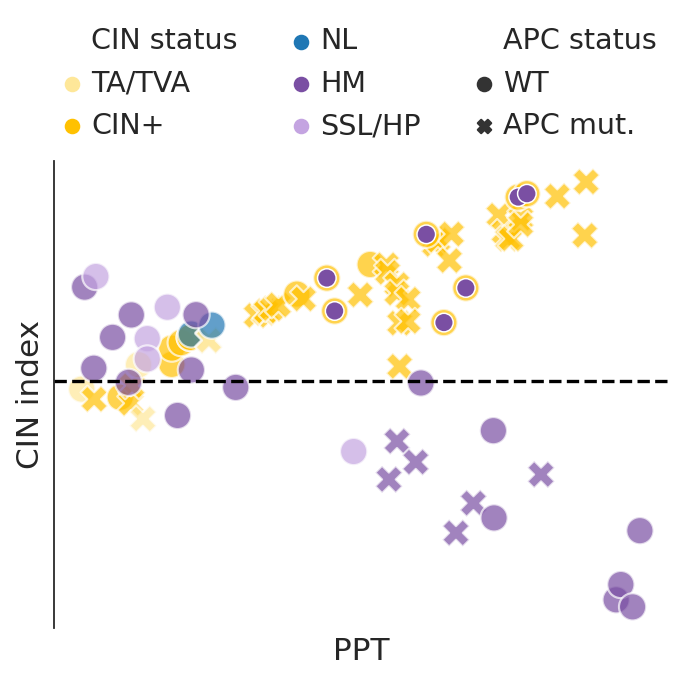

In [46]:
plt.figure(figsize=(4.5,4.5))
sns.scatterplot(
    data=custom_df.loc[~((custom_df["CIN status"]=="CIN+")&(custom_df["Tumor type"]=="MSI-H")),:],
    x="PPT", y="CIN index", style="APC status", hue="CIN status", s=150, alpha=0.7, palette=cmap_dict, style_order=["WT","APC mut."]
)
sns.scatterplot(
    data=custom_df.loc[(custom_df["CIN status"]=="CIN+")&(custom_df["Tumor type"]=="MSI-H"),:],
    x="PPT", y="CIN index", style="APC status", hue="CIN status", s=150, alpha=0.7, palette=cmap_dict, style_order=["WT","APC mut."], legend=False
)
sns.scatterplot(
    data=custom_df.loc[(custom_df["CIN status"]=="CIN+")&(custom_df["Tumor type"]=="MSI-H"),:],
    x="PPT", y="CIN index", style="APC status", hue="Tumor type", s=70, alpha=1, palette=cmap_dict, style_order=["WT","APC mut."], legend=False
)
plt.legend(bbox_to_anchor=(0, 1.02, 1, .02), loc='lower left', borderaxespad=0, mode="expand", ncol=3, frameon=False)
plt.axhline(0, color="k", ls="--")
plt.ylabel("CIN index")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off
sns.despine(bottom=True)
plt.tight_layout()
plt.savefig("plots_overview/CIN_index_APC.png")

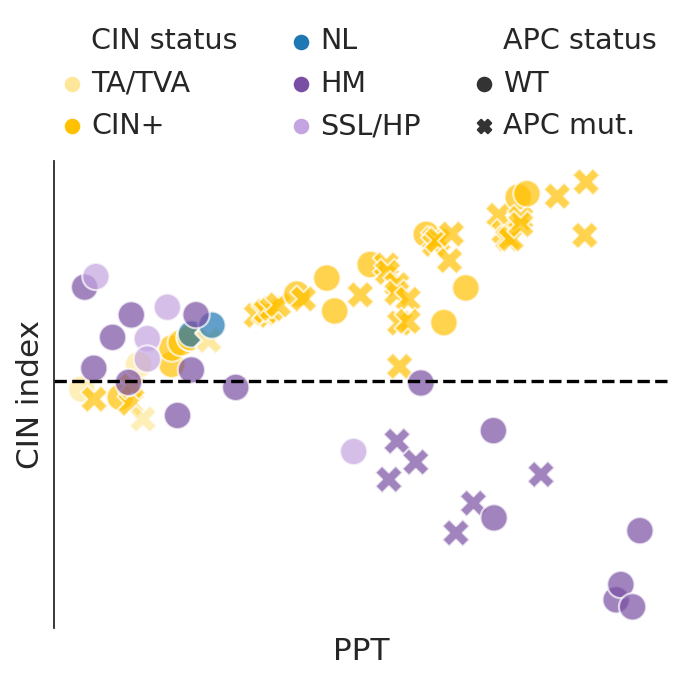

In [47]:
plt.figure(figsize=(4.5,4.5))
sns.scatterplot(
    data=custom_df,
    x="PPT", y="CIN index", style="APC status", hue="CIN status", s=150, alpha=0.7, palette=cmap_dict, style_order=["WT","APC mut."]
)
plt.legend(bbox_to_anchor=(0, 1.02, 1, .02), loc='lower left', borderaxespad=0, mode="expand", ncol=3, frameon=False)
plt.axhline(0, color="k", ls="--")
plt.ylabel("CIN index")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off
sns.despine(bottom=True)
plt.tight_layout()
plt.savefig("plots_overview/CIN_index_CINstatus_APC.png")

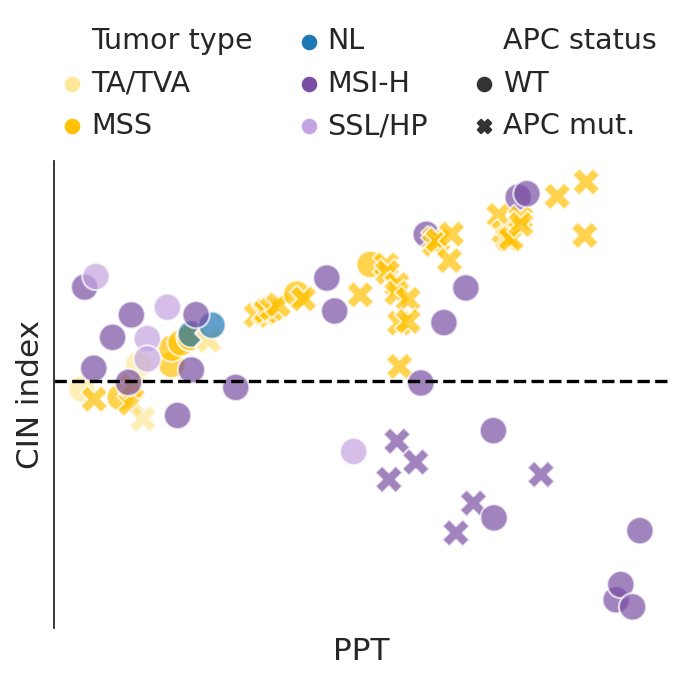

In [48]:
plt.figure(figsize=(4.5,4.5))
sns.scatterplot(
    data=custom_df,
    x="PPT", y="CIN index", style="APC status", hue="Tumor type", s=150, alpha=0.7, palette=cmap_dict, style_order=["WT","APC mut."]
)
plt.legend(bbox_to_anchor=(0, 1.02, 1, .02), loc='lower left', borderaxespad=0, mode="expand", ncol=3, frameon=False)
plt.axhline(0, color="k", ls="--")
plt.ylabel("CIN index")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off
sns.despine(bottom=True)
plt.tight_layout()
plt.savefig("plots_overview/CIN_index_tumortype_APC.png")

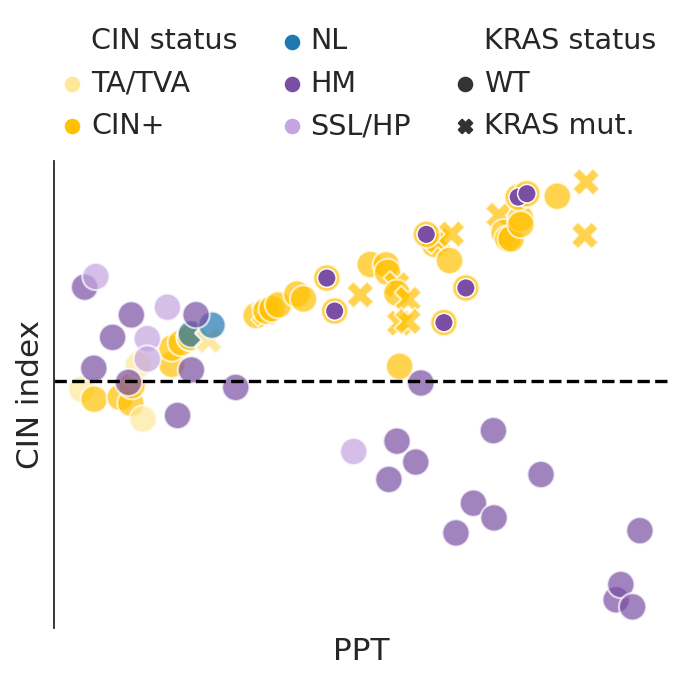

In [49]:
plt.figure(figsize=(4.5,4.5))
sns.scatterplot(
    data=custom_df.loc[~((custom_df["CIN status"]=="CIN+")&(custom_df["Tumor type"]=="MSI-H")),:],
    x="PPT", y="CIN index", style="KRAS status", hue="CIN status", s=150, alpha=0.7, palette=cmap_dict, style_order=["WT","KRAS mut."]
)
sns.scatterplot(
    data=custom_df.loc[(custom_df["CIN status"]=="CIN+")&(custom_df["Tumor type"]=="MSI-H"),:],
    x="PPT", y="CIN index", style="KRAS status", hue="CIN status", s=150, alpha=0.7, palette=cmap_dict, style_order=["WT","KRAS mut."], legend=False
)
sns.scatterplot(
    data=custom_df.loc[(custom_df["CIN status"]=="CIN+")&(custom_df["Tumor type"]=="MSI-H"),:],
    x="PPT", y="CIN index", style="KRAS status", hue="Tumor type", s=70, alpha=1, palette=cmap_dict, style_order=["WT","KRAS mut."], legend=False
)
plt.legend(bbox_to_anchor=(0, 1.02, 1, .02), loc='lower left', borderaxespad=0, mode="expand", ncol=3, frameon=False)
plt.axhline(0, color="k", ls="--")
plt.ylabel("CIN index")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off
sns.despine(bottom=True)
plt.tight_layout()
plt.savefig("plots_overview/CIN_index_KRAS.png")

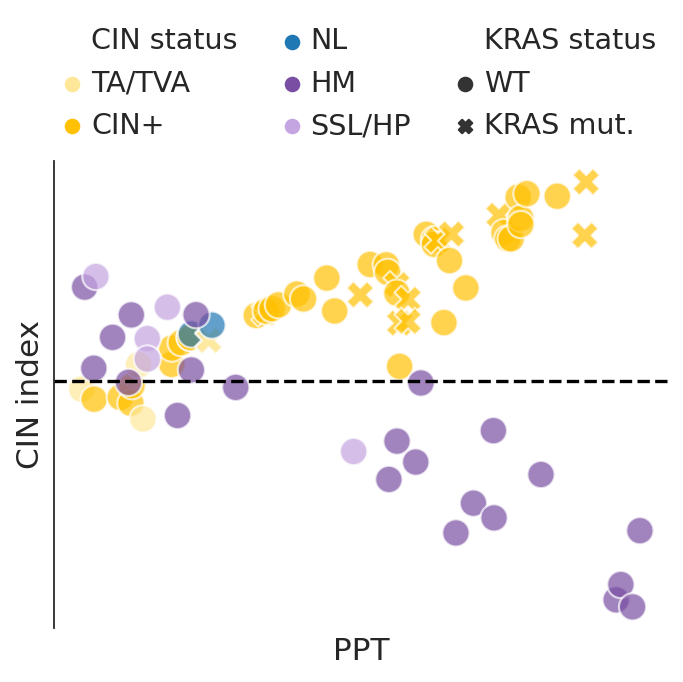

In [50]:
plt.figure(figsize=(4.5,4.5))
sns.scatterplot(
    data=custom_df,
    x="PPT", y="CIN index", style="KRAS status", hue="CIN status", s=150, alpha=0.7, palette=cmap_dict, style_order=["WT","KRAS mut."]
)
plt.legend(bbox_to_anchor=(0, 1.02, 1, .02), loc='lower left', borderaxespad=0, mode="expand", ncol=3, frameon=False)
plt.axhline(0, color="k", ls="--")
plt.ylabel("CIN index")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off
sns.despine(bottom=True)
plt.tight_layout()
plt.savefig("plots_overview/CIN_index_CINstatus_KRAS.png")

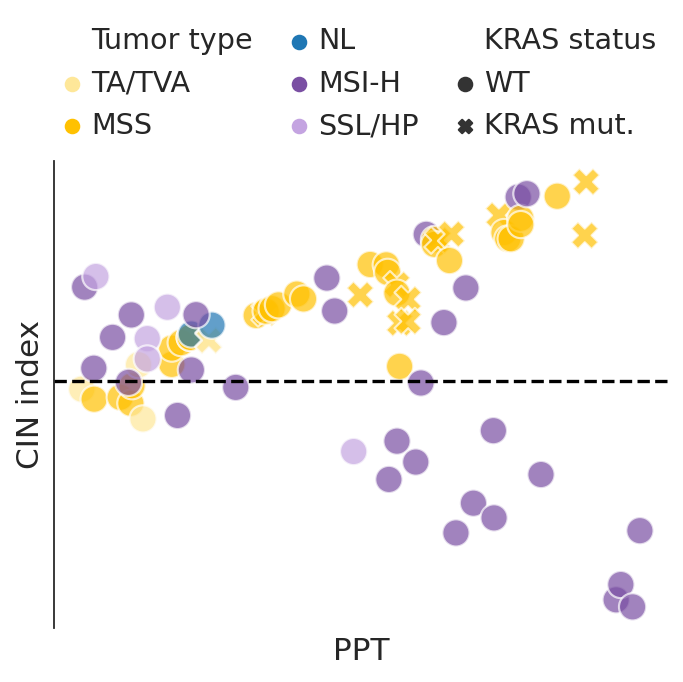

In [51]:
plt.figure(figsize=(4.5,4.5))
sns.scatterplot(
    data=custom_df,
    x="PPT", y="CIN index", style="KRAS status", hue="Tumor type", s=150, alpha=0.7, palette=cmap_dict, style_order=["WT","KRAS mut."]
)
plt.legend(bbox_to_anchor=(0, 1.02, 1, .02), loc='lower left', borderaxespad=0, mode="expand", ncol=3, frameon=False)
plt.axhline(0, color="k", ls="--")
plt.ylabel("CIN index")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off
sns.despine(bottom=True)
plt.tight_layout()
plt.savefig("plots_overview/CIN_index_tumortype_KRAS.png")

In [82]:
custom_df.loc[((custom_df["CIN status"]=="CIN+")&(custom_df["Tumor type"]=="MSI-H")),:]

CNV_LCM  CIN+ PPT (CNV score)  HM PPT (TMB)  \
LCM ROI-CNV clone                                                        
SG00001 ROI3 3      SG00001 ROI3 3              0.052812            20   
PAT73458 ROI2 1    PAT73458 ROI2 1              0.054198           344   
SG00002 ROI3 1      SG00002 ROI3 1              0.070393            11   
PAT73458 ROI1 1    PAT73458 ROI1 1              0.073511           866   
SG00001 ROI4 3      SG00001 ROI4 3              0.077386           641   
PAT73458 ROI4 1    PAT73458 ROI4 1              0.086643            31   
SG00002 ROI1 1      SG00002 ROI1 1              0.088177            34   

                         LCM_ROI APC status KRAS status TP53 status  \
LCM ROI-CNV clone                                                     
SG00001 ROI3 3      SG00001_ROI3         WT          WT          WT   
PAT73458 ROI2 1    PAT73458_ROI2         WT          WT          WT   
SG00002 ROI3 1      SG00002_ROI3         WT          WT          WT   
PAT73458 ROI1 1    PAT73458_ROI1         WT          WT          WT   
SG00001 ROI4 3      SG00001_ROI4         WT          WT          WT   
PAT73458 ROI4 1    PAT73458_ROI4         WT          WT          WT   
SG00002 ROI1 1      SG00002_ROI1         WT          WT          WT   

                  BRAF status   Patient CIN status  ... PAT71662  PAT73458  \
LCM ROI-CNV clone                                   ...                      
SG00001 ROI3 3             WT   SG00001       CIN+  ...        F         F   
PAT73458 ROI2 1            WT  PAT73458       CIN+  ...        F         T   
SG00002 ROI3 1             WT   SG00002       CIN+  ...        F         F   
PAT73458 ROI1 1            WT  PAT73458       CIN+  ...        F         T   
SG00001 ROI4 3      BRAF mut.   SG00001       CIN+  ...        F         F   
PAT73458 ROI4 1            WT  PAT73458       CIN+  ...        F         T   
SG00002 ROI1 1             WT   SG00002       CIN+  ...        F         F   

                   patient_name  tumor_type  Tumor Stage tumor_stage_actual  \
LCM ROI-CNV clone                                                             
SG00001 ROI3 3          SG00001       MSI-H           II                IIA   
PAT73458 ROI2 1        PAT73458       MSI-H           II                IIA   
SG00002 ROI3 1          SG00002       MSI-H       III/IV               IIIB   
PAT73458 ROI1 1        PAT73458       MSI-H           II                IIA   
SG00001 ROI4 3          SG00001       MSI-H           II                IIA   
PAT73458 ROI4 1        PAT73458       MSI-H           II                IIA   
SG00002 ROI1 1          SG00002       MSI-H       III/IV               IIIB   

                  Tumor Grade Tumor Location Evolution PAT71662 IES  
LCM ROI-CNV clone                                                    
SG00001 ROI3 3             G3      Ascending         B          NaN  
PAT73458 ROI2 1            G3      Ascending         B          NaN  
SG00002 ROI3 1             G3          Cecum         B          NaN  
PAT73458 ROI1 1            G3      Ascending         B          NaN  
SG00001 ROI4 3             G3      Ascending         B          NaN  
PAT73458 ROI4 1            G3      Ascending         B          NaN  
SG00002 ROI1 1             G3          Cecum         B          NaN  

[7 rows x 25 columns]

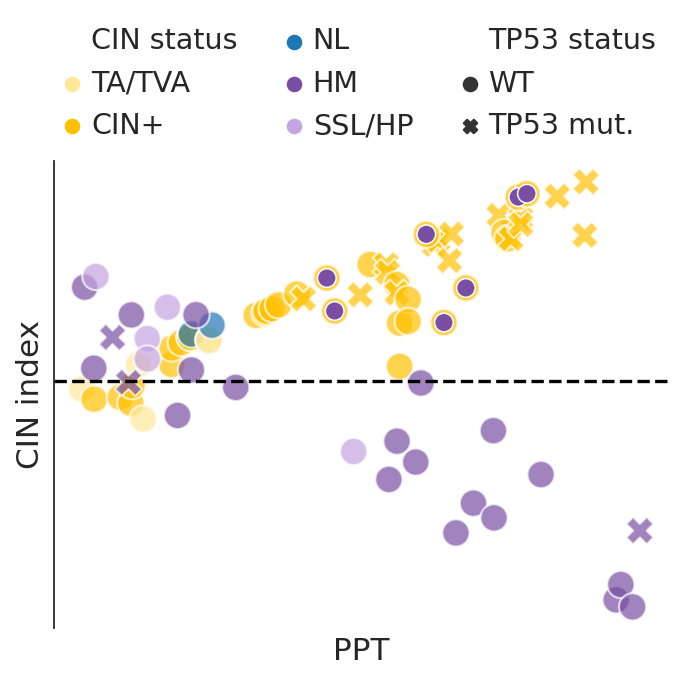

In [52]:
plt.figure(figsize=(4.5,4.5))
sns.scatterplot(
    data=custom_df.loc[~((custom_df["CIN status"]=="CIN+")&(custom_df["Tumor type"]=="MSI-H")),:],
    x="PPT", y="CIN index", style="TP53 status", hue="CIN status", s=150, alpha=0.7, palette=cmap_dict, style_order=["WT","TP53 mut."]
)
sns.scatterplot(
    data=custom_df.loc[(custom_df["CIN status"]=="CIN+")&(custom_df["Tumor type"]=="MSI-H"),:],
    x="PPT", y="CIN index", style="TP53 status", hue="CIN status", s=150, alpha=0.7, palette=cmap_dict, style_order=["WT","TP53 mut."], legend=False
)
sns.scatterplot(
    data=custom_df.loc[(custom_df["CIN status"]=="CIN+")&(custom_df["Tumor type"]=="MSI-H"),:],
    x="PPT", y="CIN index", style="TP53 status", hue="Tumor type", s=70, alpha=1, palette=cmap_dict, style_order=["WT","TP53 mut."], legend=False
)
plt.legend(bbox_to_anchor=(0, 1.02, 1, .02), loc='lower left', borderaxespad=0, mode="expand", ncol=3, frameon=False)
plt.axhline(0, color="k", ls="--")
plt.ylabel("CIN index")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off
sns.despine(bottom=True)
plt.tight_layout()
plt.savefig("plots_overview/CIN_index_TP53.png")

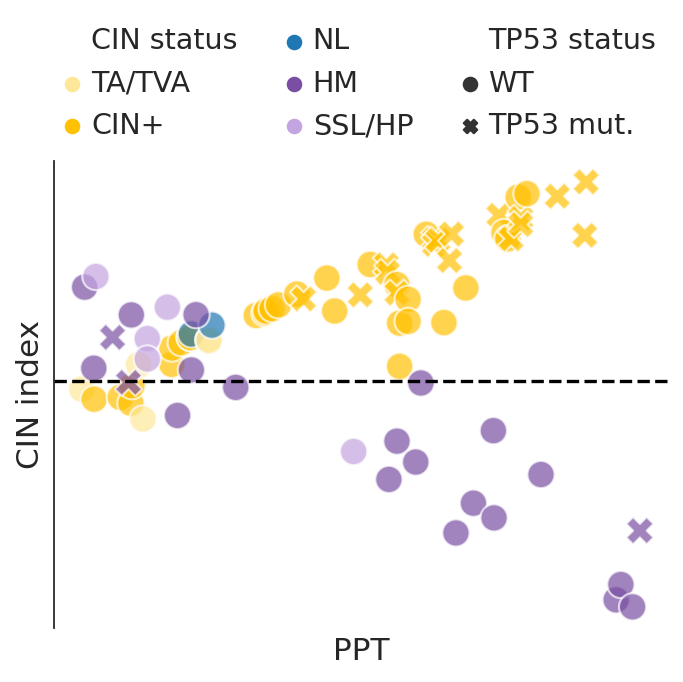

In [53]:
plt.figure(figsize=(4.5,4.5))
sns.scatterplot(
    data=custom_df,
    x="PPT", y="CIN index", style="TP53 status", hue="CIN status", s=150, alpha=0.7, palette=cmap_dict, style_order=["WT","TP53 mut."]
)
plt.legend(bbox_to_anchor=(0, 1.02, 1, .02), loc='lower left', borderaxespad=0, mode="expand", ncol=3, frameon=False)
plt.axhline(0, color="k", ls="--")
plt.ylabel("CIN index")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off
sns.despine(bottom=True)
plt.tight_layout()
plt.savefig("plots_overview/CIN_index_CINstatus_TP53.png")

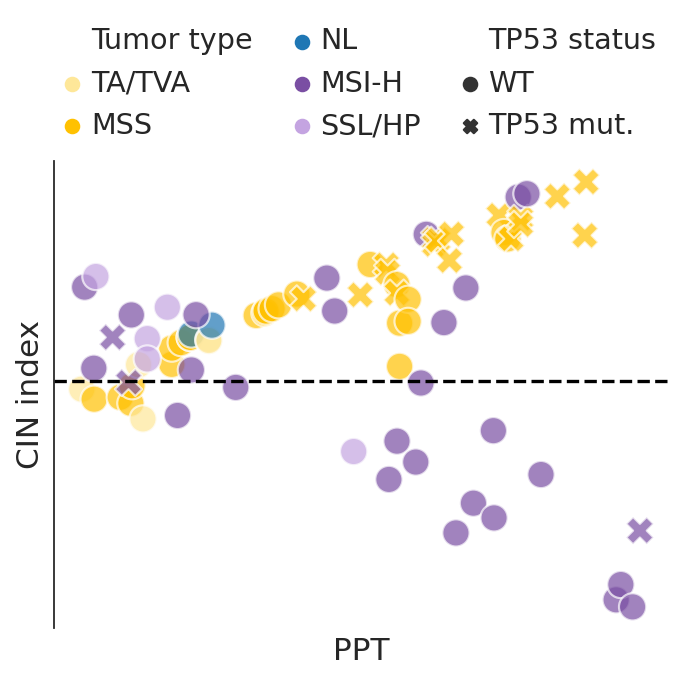

In [54]:
plt.figure(figsize=(4.5,4.5))
sns.scatterplot(
    data=custom_df,
    x="PPT", y="CIN index", style="TP53 status", hue="Tumor type", s=150, alpha=0.7, palette=cmap_dict, style_order=["WT","TP53 mut."]
)
plt.legend(bbox_to_anchor=(0, 1.02, 1, .02), loc='lower left', borderaxespad=0, mode="expand", ncol=3, frameon=False)
plt.axhline(0, color="k", ls="--")
plt.ylabel("CIN index")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off
sns.despine(bottom=True)
plt.tight_layout()
plt.savefig("plots_overview/CIN_index_tumortype_TP53.png")

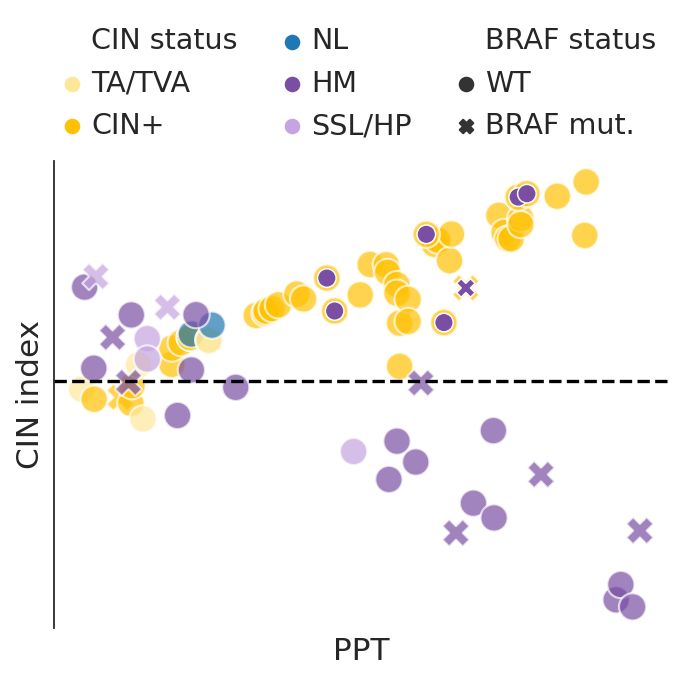

In [55]:
plt.figure(figsize=(4.5,4.5))
sns.scatterplot(
    data=custom_df.loc[~((custom_df["CIN status"]=="CIN+")&(custom_df["Tumor type"]=="MSI-H")),:],
    x="PPT", y="CIN index", style="BRAF status", hue="CIN status", s=150, alpha=0.7, palette=cmap_dict, style_order=["WT","BRAF mut."]
)
sns.scatterplot(
    data=custom_df.loc[(custom_df["CIN status"]=="CIN+")&(custom_df["Tumor type"]=="MSI-H"),:],
    x="PPT", y="CIN index", style="BRAF status", hue="CIN status", s=150, alpha=0.7, palette=cmap_dict, style_order=["WT","BRAF mut."], legend=False
)
sns.scatterplot(
    data=custom_df.loc[(custom_df["CIN status"]=="CIN+")&(custom_df["Tumor type"]=="MSI-H"),:],
    x="PPT", y="CIN index", style="BRAF status", hue="Tumor type", s=70, alpha=1, palette=cmap_dict, style_order=["WT","BRAF mut."], legend=False
)
plt.legend(bbox_to_anchor=(0, 1.02, 1, .02), loc='lower left', borderaxespad=0, mode="expand", ncol=3, frameon=False)
plt.axhline(0, color="k", ls="--")
plt.ylabel("CIN index")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off
sns.despine(bottom=True)
plt.tight_layout()
plt.savefig("plots_overview/CIN_index_BRAF.png")

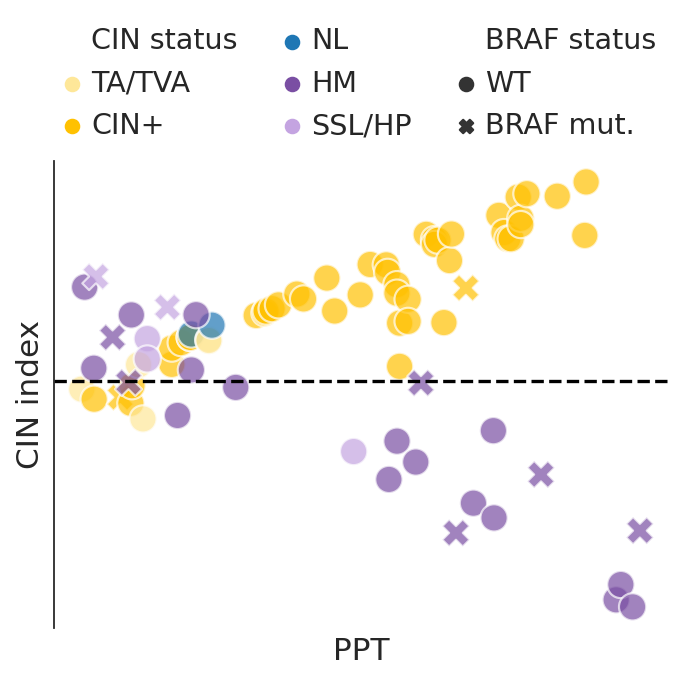

In [56]:
plt.figure(figsize=(4.5,4.5))
sns.scatterplot(
    data=custom_df,
    x="PPT", y="CIN index", style="BRAF status", hue="CIN status", s=150, alpha=0.7, palette=cmap_dict, style_order=["WT","BRAF mut."]
)
plt.legend(bbox_to_anchor=(0, 1.02, 1, .02), loc='lower left', borderaxespad=0, mode="expand", ncol=3, frameon=False)
plt.axhline(0, color="k", ls="--")
plt.ylabel("CIN index")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off
sns.despine(bottom=True)
plt.tight_layout()
plt.savefig("plots_overview/CIN_index_CINstatus_BRAF.png")

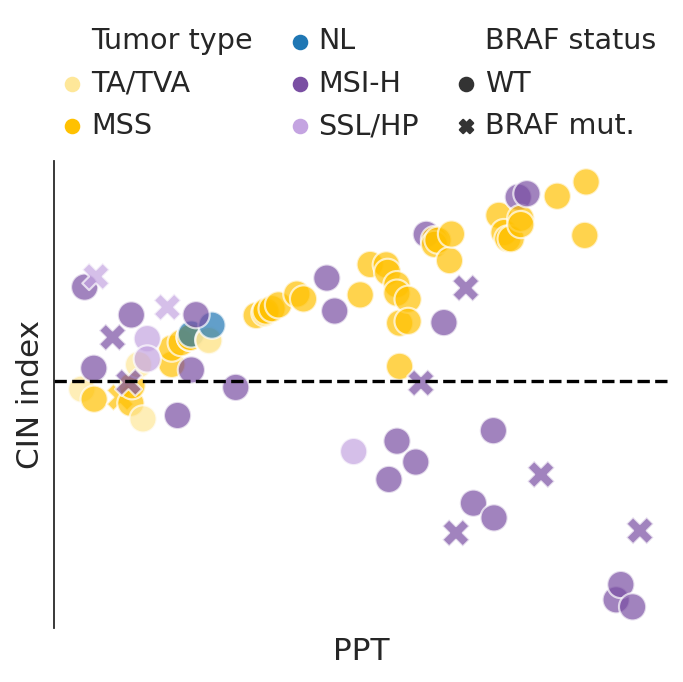

In [57]:
plt.figure(figsize=(4.5,4.5))
plt.axhline(0, color="k", ls="--")
sns.scatterplot(
    data=custom_df,
    x="PPT", y="CIN index", style="BRAF status", hue="Tumor type", s=150, alpha=0.7, palette=cmap_dict, style_order=["WT","BRAF mut."]
)
plt.legend(bbox_to_anchor=(0, 1.02, 1, .02), loc='lower left', borderaxespad=0, mode="expand", ncol=3, frameon=False)
plt.ylabel("CIN index")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off
sns.despine(bottom=True)
plt.tight_layout()
plt.savefig("plots_overview/CIN_index_tumortype_BRAF.png")

---

In [47]:
custom_df = custom_df.merge(
    sample_key[["patient_name","tumor_type","tumor_stage","tumor_stage_actual","tumor_grade","tumor_loc","Evolution"]],
    left_on=["Patient","Tumor type"], right_on=["patient_name","tumor_type"], how="left")

In [48]:
custom_df.index = custom_df["CNV_LCM"]
custom_df.index.name = "LCM ROI-CNV clone"
custom_df.rename(columns={
    "CNV score":"CIN+ PPT (CNV score)",
    "TMB":"HM PPT (TMB)",
    "tumor_grade":"Tumor Grade",
    "tumor_stage":"Tumor Stage",
    "gender":"Gender",
    "ethnicity":"Ethnicity",
    "mets":"Metastasis",
    "tumor_loc":"Tumor Location",
}, inplace=True)

In [49]:
custom_df.loc[custom_df["Tumor Stage"].isin(["AD","NL"]), "Tumor Stage"] = "nan"
custom_df.loc[custom_df["Tumor Grade"]=="NL", "Tumor Grade"] = "nan"

In [50]:
# set up colormaps
cmap_dict = {
    "SSL/HP":"#c4a4e1","MSI-H":"#7a4fa3","MSS":"#ffc101","TA/TVA":"#fee799","NL":"#1f77b4",
    "CIN+":"#ffc101","HM":"#7a4fa3",
    "Cecum":"#62a32e","Ascending":"#b0dc7d","Hepatic Flexure":"#ebf6db","Transverse":"#fbe6f1","Descending":"#eeadd4","Sigmoid":"#cf4191",
    #"Cecum":"#1f4e79","Ascending":"#2e74b7","Hepatic Flexure":"#bdd6ef","Transverse":"#ff717a","Descending":"#fe0001","Sigmoid":"#c00101",
    "lymph_node":"#000000",
    "nan":"#ffffff",
    "KRAS mut.":"#000000","APC mut.":"#000000","TP53 mut.":"#000000","BRAF mut.":"#000000",
    "WT":"#ffffff",
    "T":"#000000","F":"#ffffff",
    "N":"#1f77b4","L":"#ff7f0e","B":"#2ca02c",
    "DOD":"#ff0000","DOC":"#ff0000","AWD":"#ffff00","NED":"#008000",
}
stagecolor_dict = dict(zip(["I","II","III/IV"], sns.color_palette("Greys", 3).as_hex()))
gradecolor_dict = dict(zip(["G1","G2","G3"], sns.color_palette("Greys", 3).as_hex()))
cnvcolor_dict = dict(zip(custom_df["CIN+ PPT (CNV score)"].unique()[custom_df["CIN+ PPT (CNV score)"].unique().argsort()].astype(str), sns.color_palette("Greys", len(custom_df["CIN+ PPT (CNV score)"].unique())).as_hex()))
varcolor_dict = dict(zip(custom_df["HM PPT (TMB)"].unique()[custom_df["HM PPT (TMB)"].unique().argsort()].astype(str), sns.color_palette("Greys", len(custom_df["HM PPT (TMB)"].unique())).as_hex()))
cmap_dict = {**stagecolor_dict, **cmap_dict, **gradecolor_dict, **cnvcolor_dict, **varcolor_dict}

---

In [222]:
# set up box label strings
tmp = custom_df[["CIN+ PPT (CNV score)","HM PPT (TMB)","Tumor type","Tumor Location","Tumor Grade","tumor_stage_actual","APC status","KRAS status","TP53 status","BRAF status","Evolution"]].T
tmp.loc[["CIN+ PPT (CNV score)","HM PPT (TMB)","Tumor type","Tumor Location","APC status","KRAS status","TP53 status","BRAF status"]] = ""
tmp = tmp.fillna("")
tmp = tmp.replace("nan", "")
tmp = tmp.replace("F", "")
labels = np.asarray(tmp)

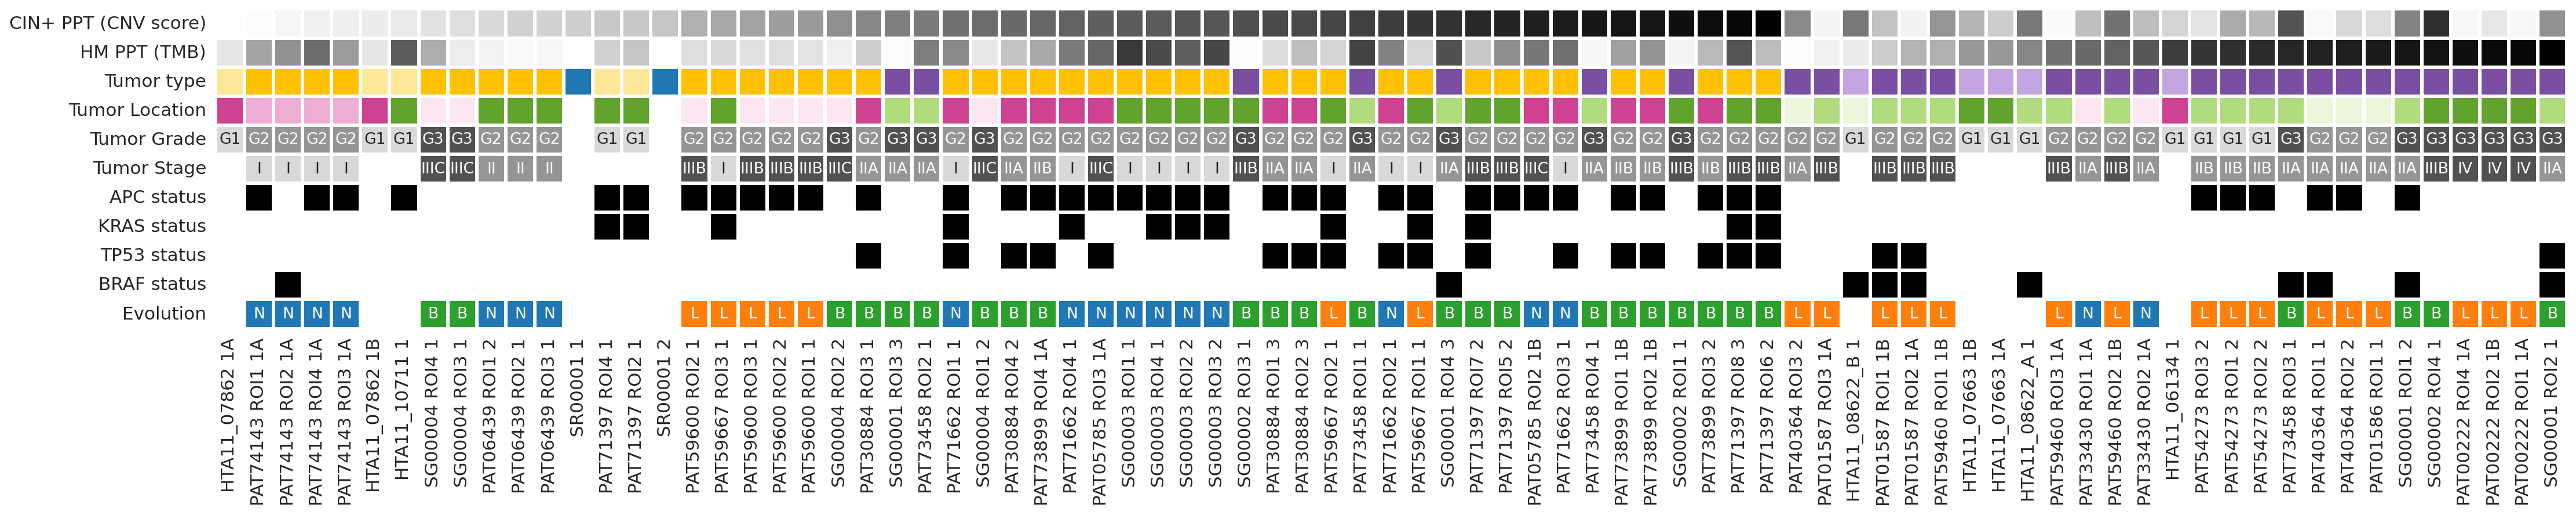

In [223]:
fig, ax = plt.subplots(1, 1, figsize=(28,8))
# Plot the categorical columns as heatmap
catheat.heatmap(
    custom_df[
        ["CIN+ PPT (CNV score)","HM PPT (TMB)","Tumor type","Tumor Location","Tumor Grade","Tumor Stage","APC status","KRAS status","TP53 status","BRAF status","Evolution"]
    ].T.fillna("F"),
    cmap=cmap_dict,
    ax=ax,
    leg_pos="right",
    square=True,
    linewidths=2,
    legend=False,
    annot=labels,
    fmt="",
    annot_kws={"fontsize":12},
)
plt.xlabel("")
plt.tick_params(left = False, bottom = False)
plt.tight_layout()
plt.savefig("../../manuscript/figures/panels/CNV_LCM_heatmap_categorized.png", dpi=800)

---
# Pared-down for Figure 3

In [227]:
# set up box label strings
tmp = custom_df[["CIN+ PPT (CNV score)","HM PPT (TMB)","Tumor type","Evolution"]].T
tmp.loc[["CIN+ PPT (CNV score)","HM PPT (TMB)","Tumor type"]] = ""
tmp = tmp.fillna("")
tmp = tmp.replace("nan", "")
tmp = tmp.replace("F", "")
labels = np.asarray(tmp)

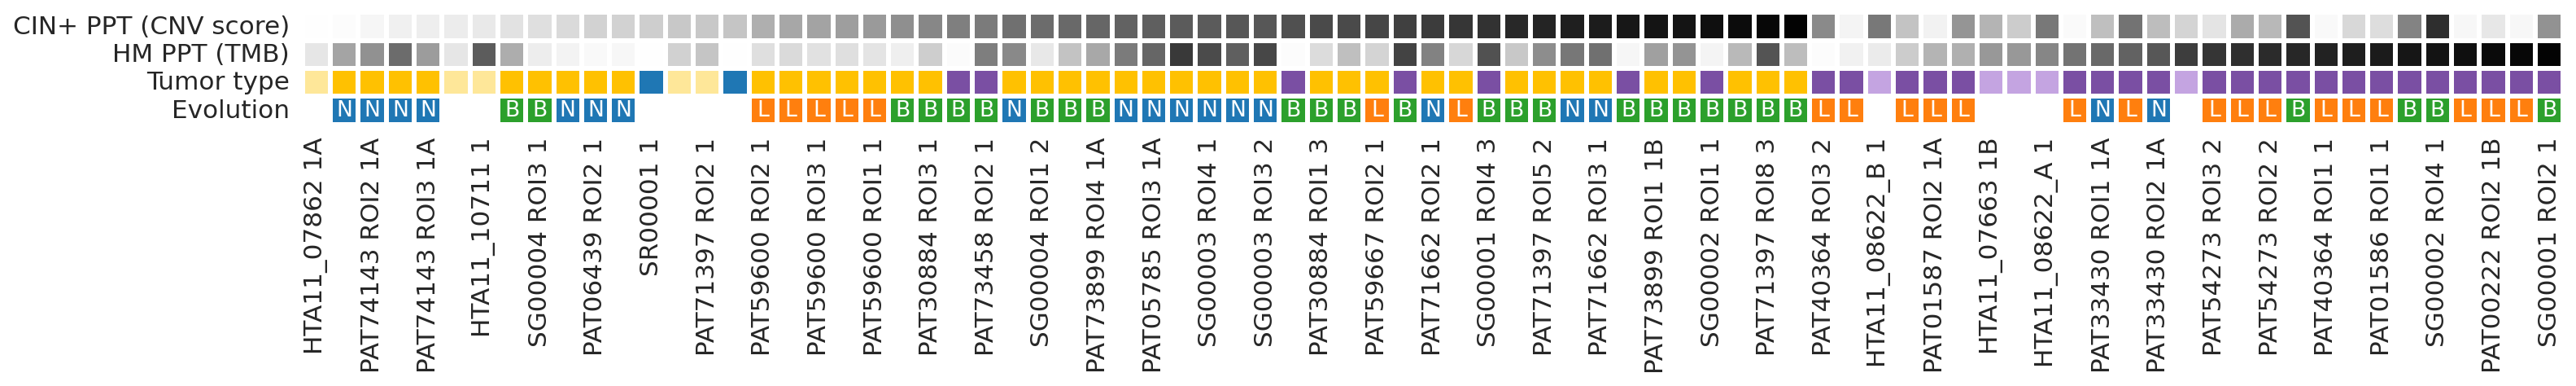

In [228]:
fig, ax = plt.subplots(1, 1, figsize=(20,4))
# Plot the categorical columns as heatmap
catheat.heatmap(
    custom_df[
        ["CIN+ PPT (CNV score)","HM PPT (TMB)","Tumor type","Evolution"]
    ].T.fillna("F"),
    cmap=cmap_dict,
    ax=ax,
    leg_pos="right",
    square=True,
    linewidths=2,
    legend=False,
    annot=labels,
    fmt="",
    annot_kws={"fontsize":12},
)
plt.xlabel("")
plt.tick_params(left = False, bottom = False)
plt.tight_layout()
plt.savefig("../../manuscript/figures/panels/CNV_LCM_heatmap_categorized_Fig3.png", dpi=800)

In [229]:
# set up box label strings
tmp = custom_df[["CIN+ PPT (CNV score)","HM PPT (TMB)","Tumor type","Evolution","APC status","KRAS status","TP53 status","BRAF status"]].T
tmp.loc[["CIN+ PPT (CNV score)","HM PPT (TMB)","Tumor type","APC status","KRAS status","TP53 status","BRAF status"]] = ""
tmp = tmp.fillna("")
tmp = tmp.replace("nan", "")
tmp = tmp.replace("F", "")
labels = np.asarray(tmp)

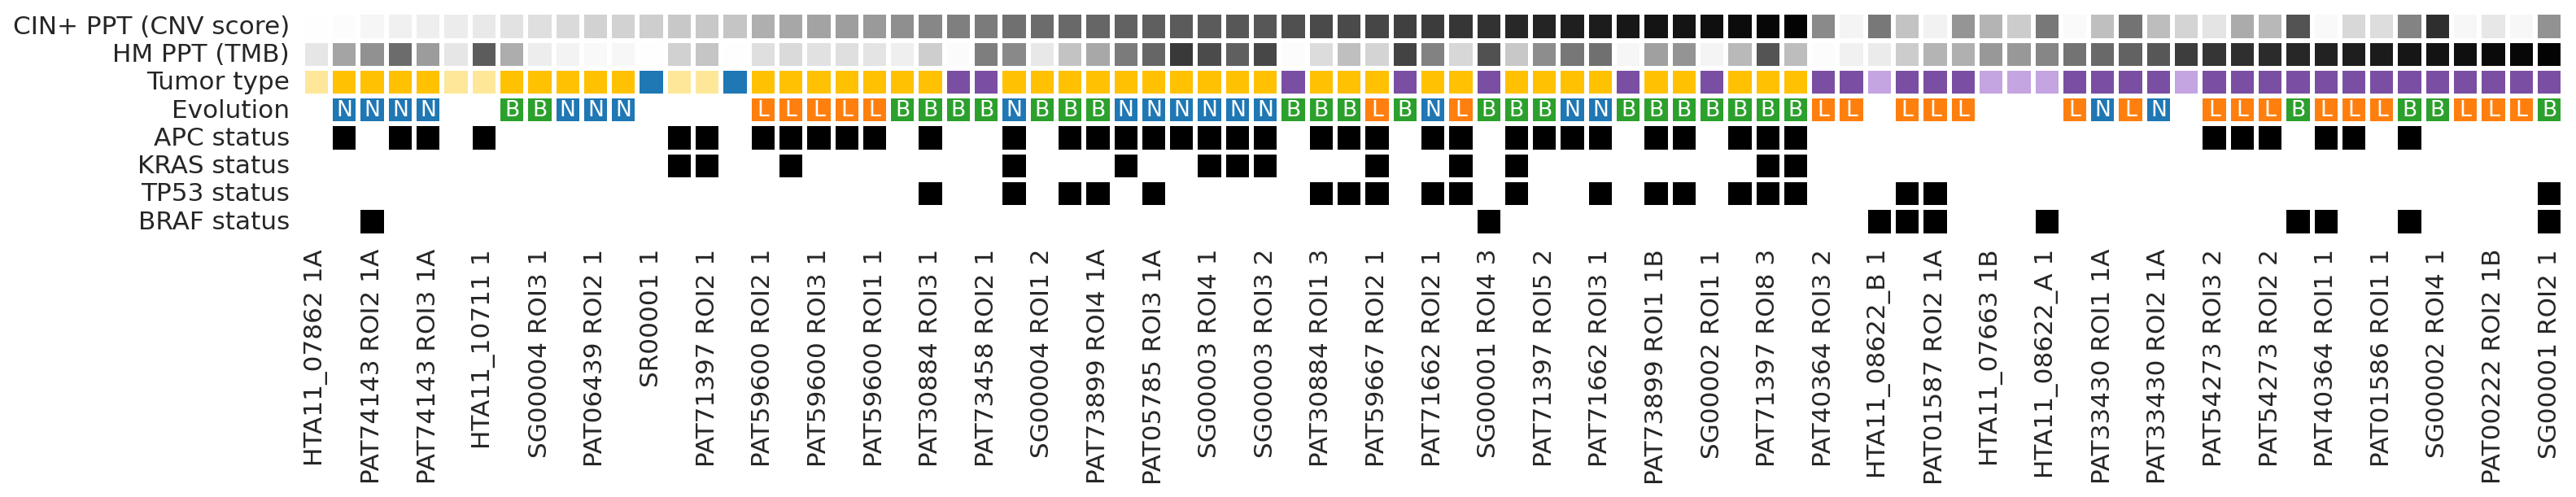

In [230]:
fig, ax = plt.subplots(1, 1, figsize=(20,4))
# Plot the categorical columns as heatmap
catheat.heatmap(
    custom_df[
        ["CIN+ PPT (CNV score)","HM PPT (TMB)","Tumor type","Evolution","APC status","KRAS status","TP53 status","BRAF status"]
    ].T.fillna("F"),
    cmap=cmap_dict,
    ax=ax,
    leg_pos="right",
    square=True,
    linewidths=2,
    legend=False,
    annot=labels,
    fmt="",
    annot_kws={"fontsize":12},
)
plt.xlabel("")
plt.tick_params(left = False, bottom = False)
plt.tight_layout()
plt.savefig("../../manuscript/figures/panels/CNV_LCM_heatmap_categorized_Fig3_drivermuts.png", dpi=800)

---

In [91]:
custom_df_2 = a_comb.obs.loc[
    a_comb.obs["CNV_LCM"].isin(custom_df["CNV_LCM"].unique()),
    ["CNV_LCM","iCMS3","iCMS2","IES","CRC2"]
].groupby("CNV_LCM").mean()

custom_df_2 = custom_df.merge(custom_df_2, left_on="CNV_LCM", right_index=True)

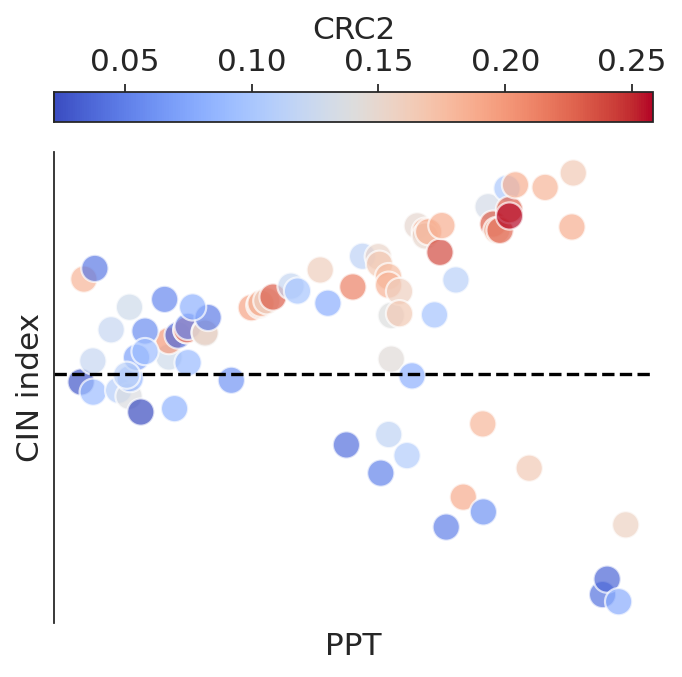

In [92]:
feature = "CRC2"

plt.figure(figsize=(4.5,4.5))
plt.axhline(0, color="k", ls="--")
sns.scatterplot(
    data=custom_df_2,
    x="PPT", y="CIN index", hue=feature, s=150, alpha=0.7, palette="coolwarm", legend=None,
)

norm = plt.Normalize(custom_df_2[feature].min(), custom_df_2[feature].max())
cmap = sns.color_palette("coolwarm", as_cmap=True)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, orientation="horizontal", location="top")
cbar.ax.set_xlabel(feature)

plt.ylabel("CIN index")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off
sns.despine(bottom=True)
plt.tight_layout()
plt.savefig("plots_overview/CIN_index_{}.png".format(feature))

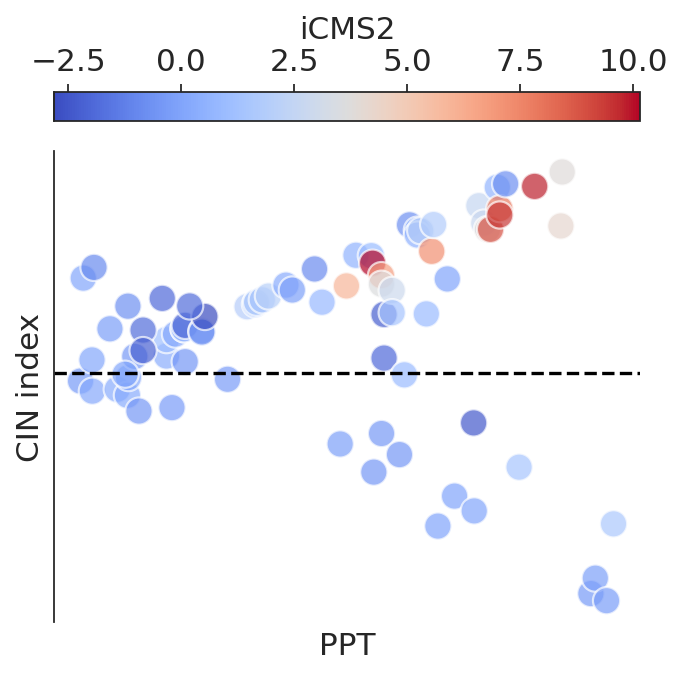

In [53]:
feature = "iCMS2"

plt.figure(figsize=(4.5,4.5))
plt.axhline(0, color="k", ls="--")
sns.scatterplot(
    data=custom_df_2,
    x="PPT", y="CIN index", hue=feature, s=150, alpha=0.7, palette="coolwarm", legend=None,
)

norm = plt.Normalize(custom_df_2[feature].min(), custom_df_2[feature].max())
cmap = sns.color_palette("coolwarm", as_cmap=True)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, orientation="horizontal", location="top")
cbar.ax.set_xlabel(feature)

plt.ylabel("CIN index")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off
sns.despine(bottom=True)
plt.tight_layout()
plt.savefig("plots_overview/CIN_index_{}.png".format(feature))

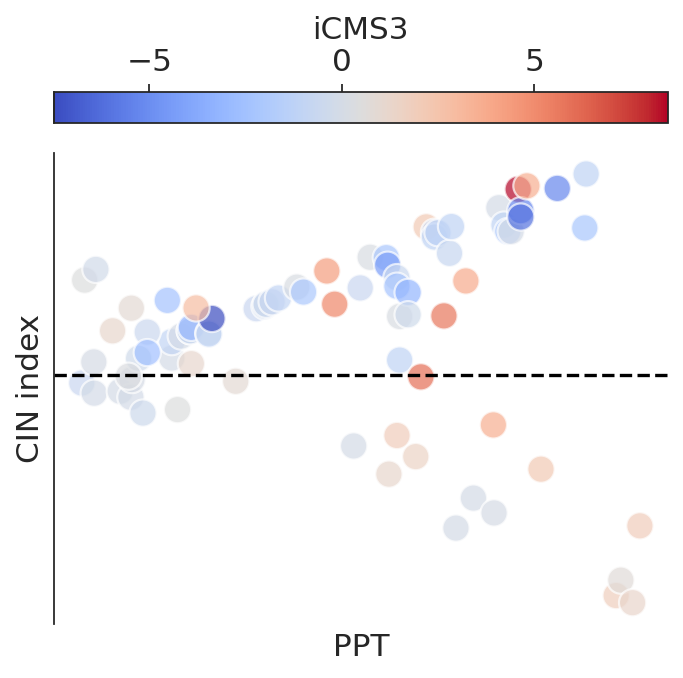

In [54]:
feature = "iCMS3"

plt.figure(figsize=(4.5,4.5))
plt.axhline(0, color="k", ls="--")
sns.scatterplot(
    data=custom_df_2,
    x="PPT", y="CIN index", hue=feature, s=150, alpha=0.7, palette="coolwarm", legend=None,
)

norm = plt.Normalize(custom_df_2[feature].min(), custom_df_2[feature].max())
cmap = sns.color_palette("coolwarm", as_cmap=True)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, orientation="horizontal", location="top")
cbar.ax.set_xlabel(feature)

plt.ylabel("CIN index")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off
sns.despine(bottom=True)
plt.tight_layout()
plt.savefig("plots_overview/CIN_index_{}.png".format(feature))

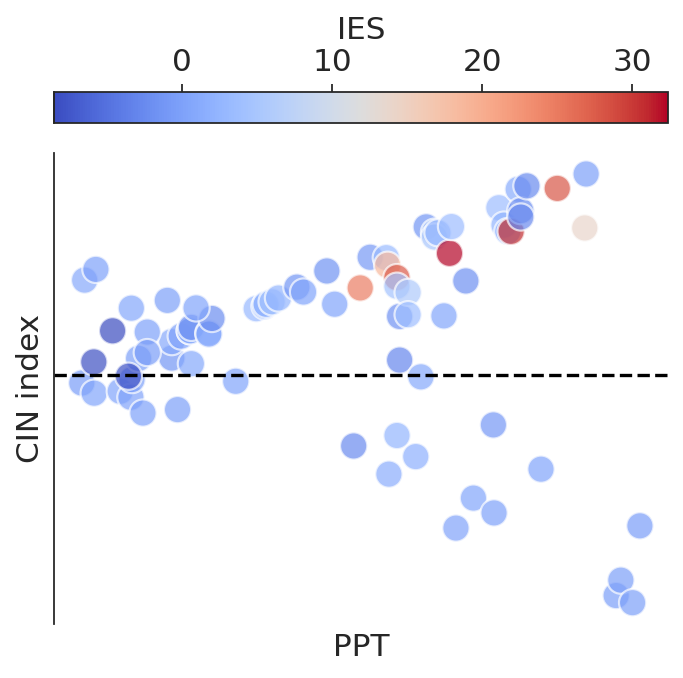

In [55]:
feature = "IES"

plt.figure(figsize=(4.5,4.5))
plt.axhline(0, color="k", ls="--")
sns.scatterplot(
    data=custom_df_2,
    x="PPT", y="CIN index", hue=feature, s=150, alpha=0.7, palette="coolwarm", legend=None,
)

norm = plt.Normalize(custom_df_2[feature].min(), custom_df_2[feature].max())
cmap = sns.color_palette("coolwarm", as_cmap=True)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, orientation="horizontal", location="top")
cbar.ax.set_xlabel(feature)

plt.ylabel("CIN index")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off
sns.despine(bottom=True)
plt.tight_layout()
plt.savefig("plots_overview/CIN_index_{}.png".format(feature))

In [58]:
custom_df_2["PAT71662 IES"] = np.nan
custom_df_2.loc[custom_df_2.Patient=="PAT71662","PAT71662 IES"] = custom_df_2.loc[custom_df_2.Patient=="PAT71662","IES"]

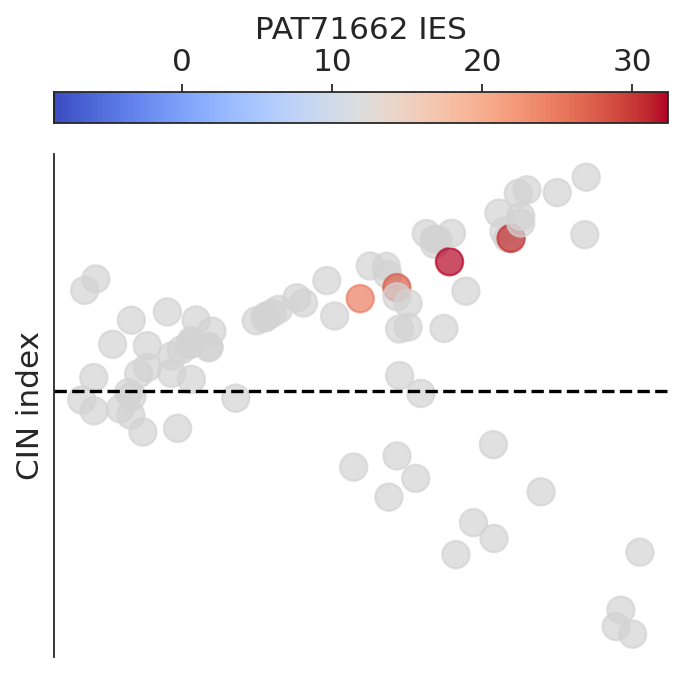

In [78]:
feature = "PAT71662 IES"

plt.figure(figsize=(4.5,4.5))
plt.axhline(0, color="k", ls="--")

cmap1 = plt.cm.get_cmap("coolwarm").copy()
cmap1.set_bad("lightgrey", alpha=0.7)

plt.scatter(
    data=custom_df_2,
    x="PPT", y="CIN index", c=feature, s=150, alpha=0.7, cmap=cmap1, plotnonfinite=True,
    vmin=custom_df_2["IES"].min(), vmax=custom_df_2["IES"].max()
)

norm = plt.Normalize(custom_df_2["IES"].min(), custom_df_2["IES"].max())
cmap = sns.color_palette("coolwarm", as_cmap=True)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, orientation="horizontal", location="top")
cbar.ax.set_xlabel(feature)

plt.ylabel("CIN index")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off
sns.despine(bottom=True)
plt.tight_layout()
plt.savefig("plots_overview/CIN_index_{}.png".format(feature.replace(" ","_")))

In [79]:
custom_df_2["PAT73458 IES"] = np.nan
custom_df_2.loc[custom_df_2.Patient=="PAT73458","PAT73458 IES"] = custom_df_2.loc[custom_df_2.Patient=="PAT73458","IES"]

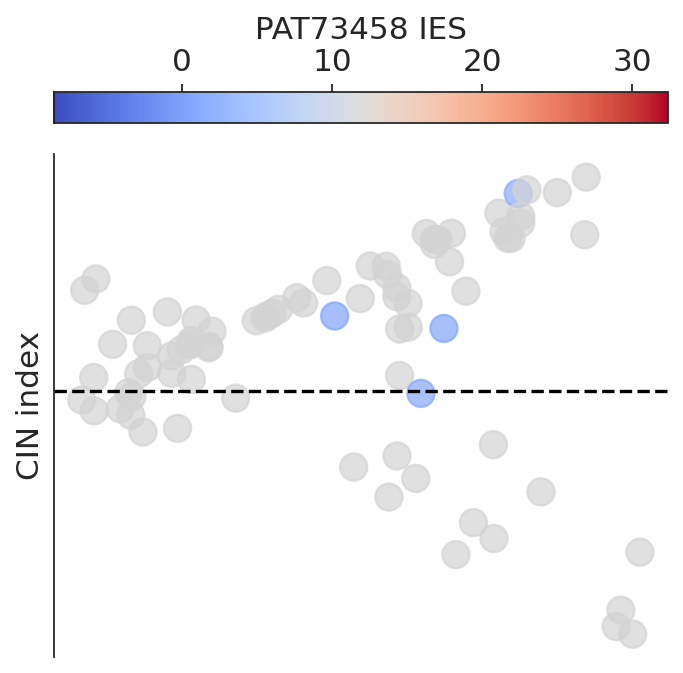

In [80]:
feature = "PAT73458 IES"

plt.figure(figsize=(4.5,4.5))
plt.axhline(0, color="k", ls="--")

cmap1 = plt.cm.get_cmap("coolwarm").copy()
cmap1.set_bad("lightgrey", alpha=0.7)

plt.scatter(
    data=custom_df_2,
    x="PPT", y="CIN index", c=feature, s=150, alpha=0.7, cmap=cmap1, plotnonfinite=True,
    vmin=custom_df_2["IES"].min(), vmax=custom_df_2["IES"].max()
)

norm = plt.Normalize(custom_df_2["IES"].min(), custom_df_2["IES"].max())
cmap = sns.color_palette("coolwarm", as_cmap=True)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, orientation="horizontal", location="top")
cbar.ax.set_xlabel(feature)

plt.ylabel("CIN index")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off
sns.despine(bottom=True)
plt.tight_layout()
plt.savefig("plots_overview/CIN_index_{}.png".format(feature.replace(" ","_")))

In [99]:
custom_df_2["SG00001 IES"] = np.nan
custom_df_2.loc[custom_df_2.Patient=="SG00001","SG00001 IES"] = custom_df_2.loc[custom_df_2.Patient=="SG00001","IES"]

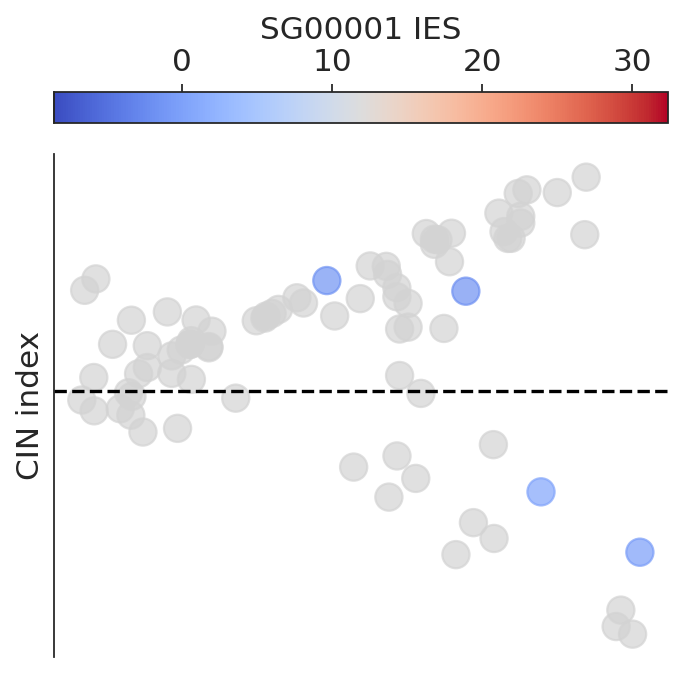

In [100]:
feature = "SG00001 IES"

plt.figure(figsize=(4.5,4.5))
plt.axhline(0, color="k", ls="--")

cmap1 = plt.cm.get_cmap("coolwarm").copy()
cmap1.set_bad("lightgrey", alpha=0.7)

plt.scatter(
    data=custom_df_2,
    x="PPT", y="CIN index", c=feature, s=150, alpha=0.7, cmap=cmap1, plotnonfinite=True,
    vmin=custom_df_2["IES"].min(), vmax=custom_df_2["IES"].max()
)

norm = plt.Normalize(custom_df_2["IES"].min(), custom_df_2["IES"].max())
cmap = sns.color_palette("coolwarm", as_cmap=True)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, orientation="horizontal", location="top")
cbar.ax.set_xlabel(feature)

plt.ylabel("CIN index")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off
sns.despine(bottom=True)
plt.tight_layout()
plt.savefig("plots_overview/CIN_index_{}.png".format(feature.replace(" ","_")))

In [97]:
custom_df_2["SG00002 IES"] = np.nan
custom_df_2.loc[custom_df_2.Patient=="SG00002","SG00002 IES"] = custom_df_2.loc[custom_df_2.Patient=="SG00002","IES"]

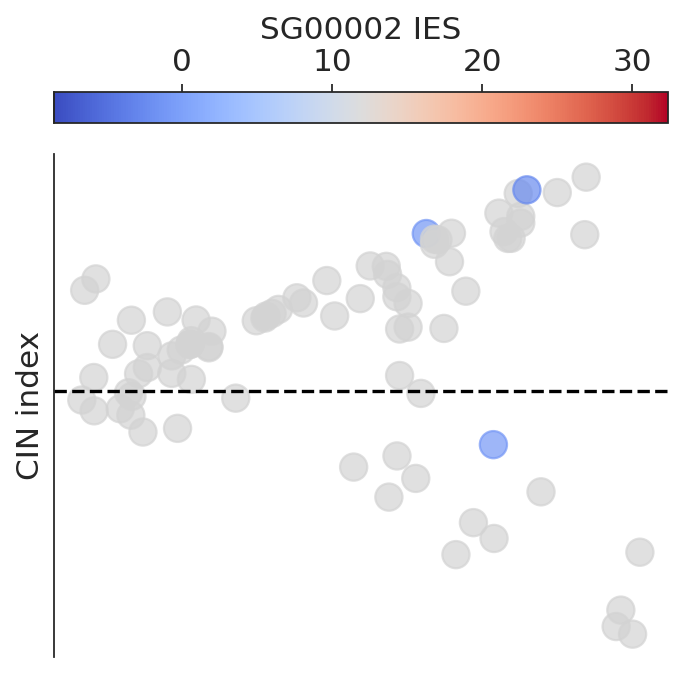

In [98]:
feature = "SG00002 IES"

plt.figure(figsize=(4.5,4.5))
plt.axhline(0, color="k", ls="--")

cmap1 = plt.cm.get_cmap("coolwarm").copy()
cmap1.set_bad("lightgrey", alpha=0.7)

plt.scatter(
    data=custom_df_2,
    x="PPT", y="CIN index", c=feature, s=150, alpha=0.7, cmap=cmap1, plotnonfinite=True,
    vmin=custom_df_2["IES"].min(), vmax=custom_df_2["IES"].max()
)

norm = plt.Normalize(custom_df_2["IES"].min(), custom_df_2["IES"].max())
cmap = sns.color_palette("coolwarm", as_cmap=True)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, orientation="horizontal", location="top")
cbar.ax.set_xlabel(feature)

plt.ylabel("CIN index")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off
sns.despine(bottom=True)
plt.tight_layout()
plt.savefig("plots_overview/CIN_index_{}.png".format(feature.replace(" ","_")))

---

In [58]:
import sys; sys.path.append("../../../utility_scripts/"); from visium_utils import *

In [59]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns # For pairplots and heatmaps
import matplotlib.pyplot as plt

In [60]:
sns.set_style("white")

In [61]:
def display_correlation(df, figsize=(10,10)):
    r = df.corr(method="spearman")
    plt.figure(figsize=figsize)
    heatmap = sns.clustermap(
        df.corr(),
        vmin=-1, 
        vmax=1,
        annot=True,
    )
    heatmap.ax_row_dendrogram.set_visible(False)
    plt.title("Spearman Correlation")
    return(r)


def plot_data_corr(df, title, color="green"):    
    r = display_correlation(df)
    fig, ax = plt.subplots(nrows=2, ncols=int((len(df.columns)-1)/2),figsize=(40,3))
    for i in range(1,len(df.columns)):
        ax[i-1].scatter(df["CNV score"],df.values[:,i],color=color)
        ax[i-1].title.set_text(title[i] +'\n r = ' + 
                             "{:.2f}".format(r.values[0,i]))
        ax[i-1].set(xlabel=df.columns[0],ylabel=df.columns[i])
    fig.subplots_adjust(wspace=.7)    
    plt.show()

In [62]:
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)

---

In [63]:
for gene in ["DDR1","TGFBI","PAK4","DPEP1"]:
    a_comb.obs[gene] = a_comb[:,gene].X.todense()

---

In [238]:
CIN_df = a_comb.obs.loc[
    a_comb.obs["CNV_LCM"].isin(custom_df.loc[custom_df["CIN status"].isin(["CIN+","NL","TA/TVA"]), "CNV_LCM"].unique()),
    ["CNV_LCM","CNV score","iCMS2","DDR1","TGFBI","PAK4","DPEP1"]
].groupby("CNV_LCM").mean()

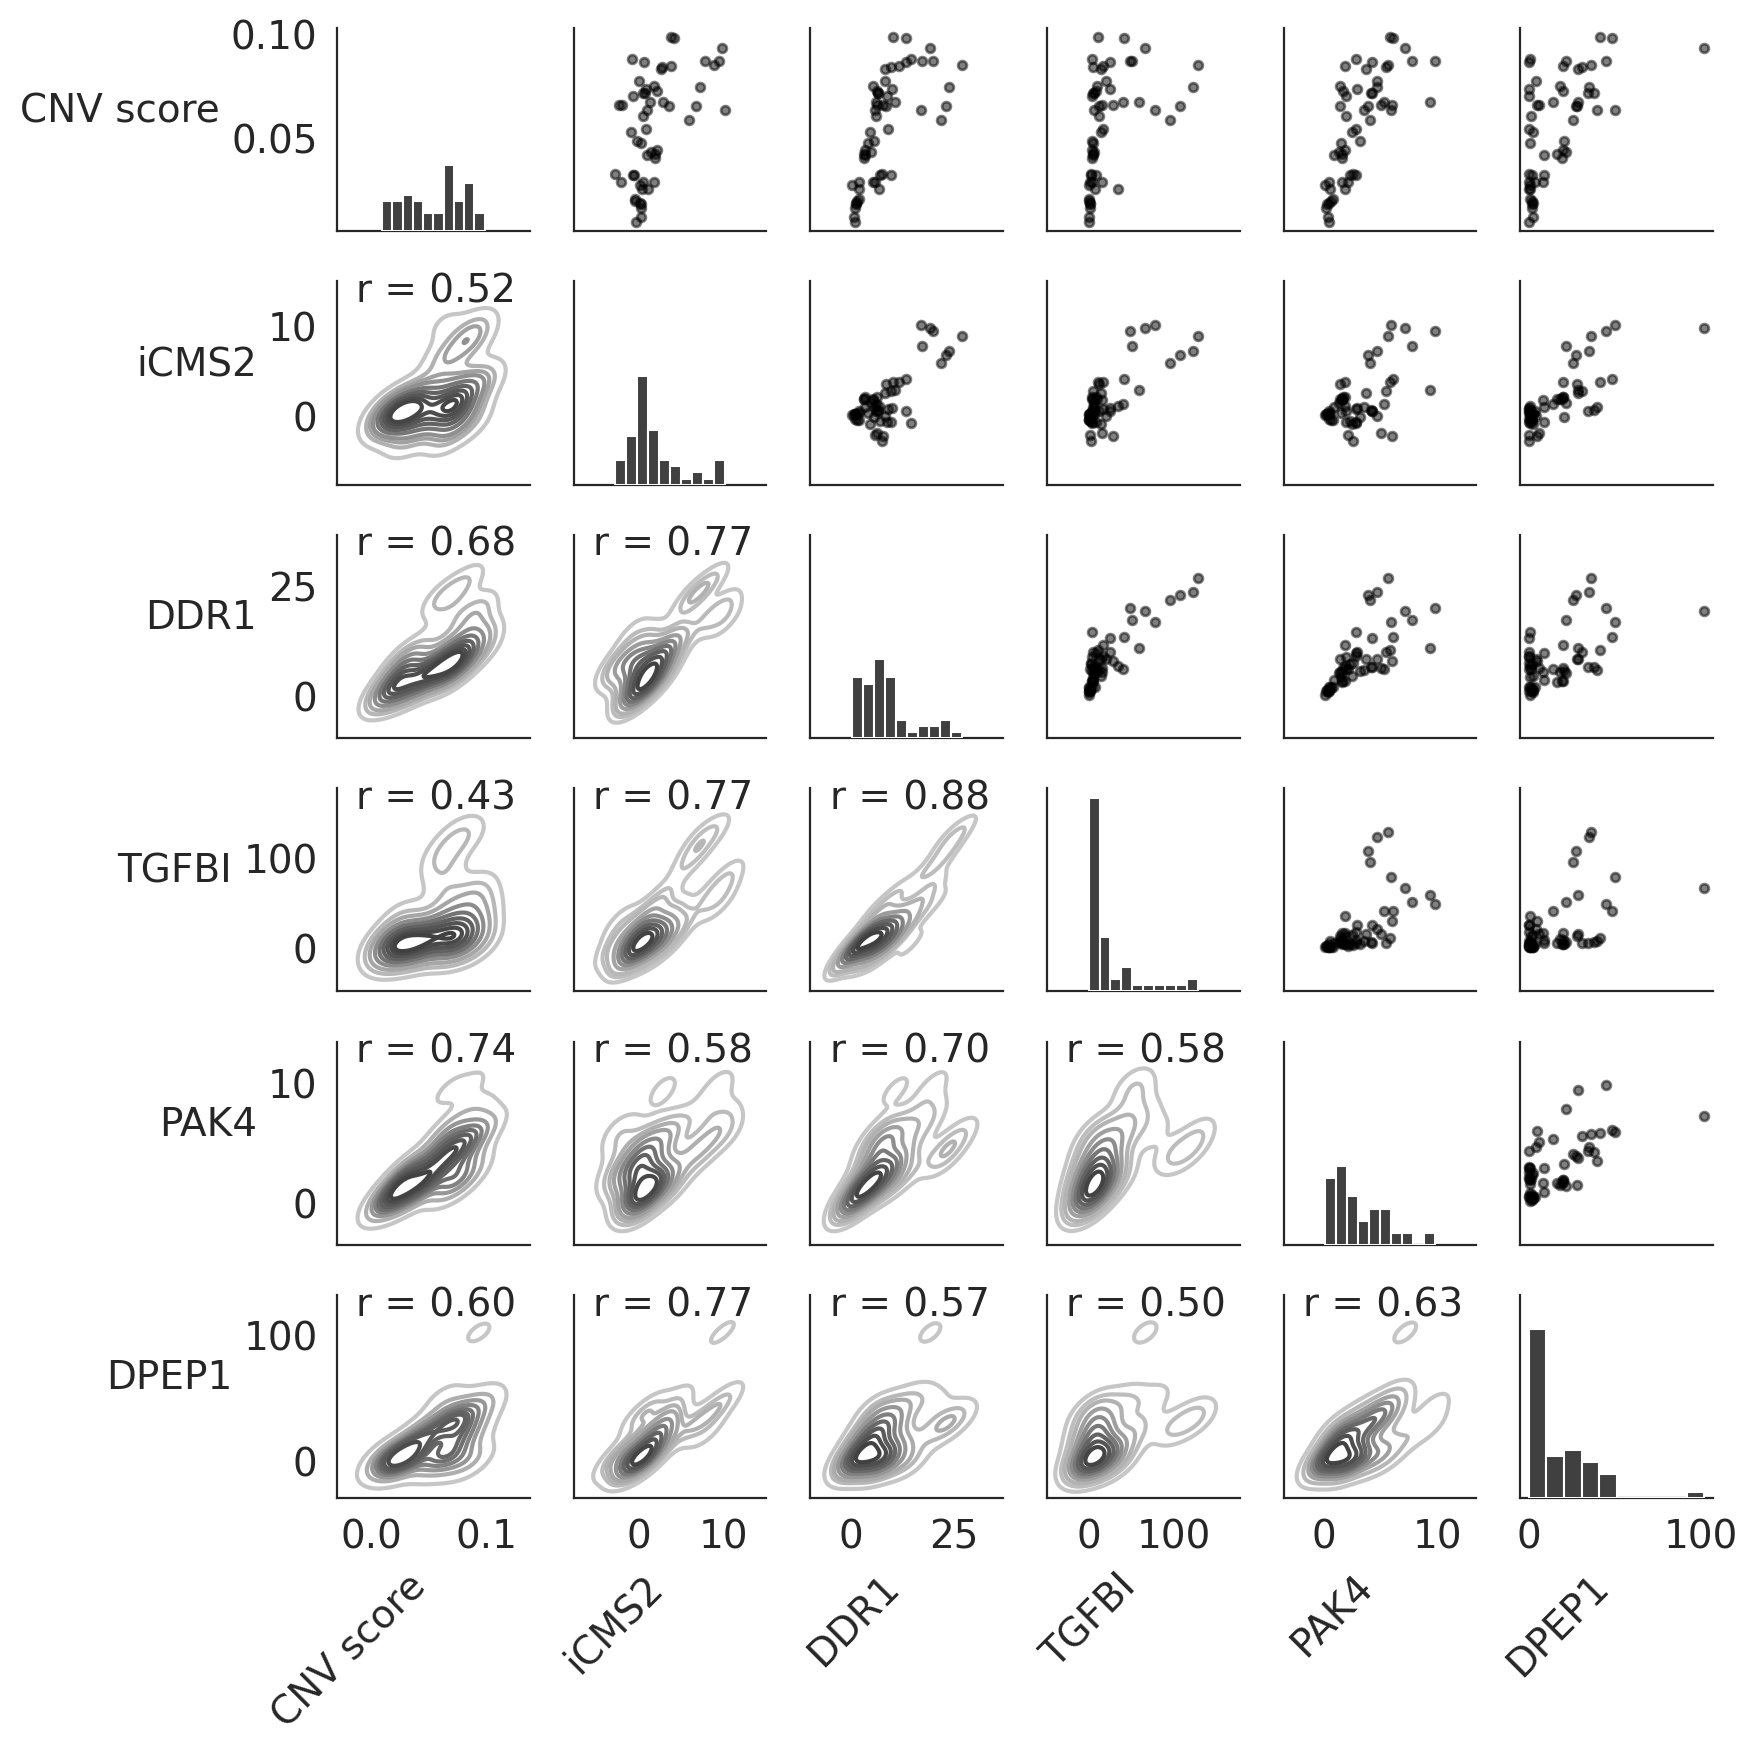

In [239]:
g = sns.PairGrid(CIN_df, palette=["Greys"], height=1.5)
g.map_upper(plt.scatter, s=10, alpha=0.5, color="k")
g.map_diag(sns.histplot, bins=10, color="k")
g.map_lower(sns.kdeplot, cmap="Greys_d")
g.map_lower(corrfunc)
for ax in g.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 45)
    # set x labels alignment
    ax.xaxis.get_label().set_horizontalalignment('right')
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation = 0)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')
plt.tight_layout()
plt.savefig("plots_overview/immexcl_PTregression.png")

---

In [240]:
CIN_df = a_comb.obs.loc[
    a_comb.obs["CNV_LCM"].isin(custom_df.loc[custom_df["CIN status"].isin(["CIN+","NL","TA/TVA"]), "CNV_LCM"].unique()),
    ["CNV_LCM","CNV score","iCMS2","IES","TL2","T cell CD8"]
].groupby("CNV_LCM").mean()

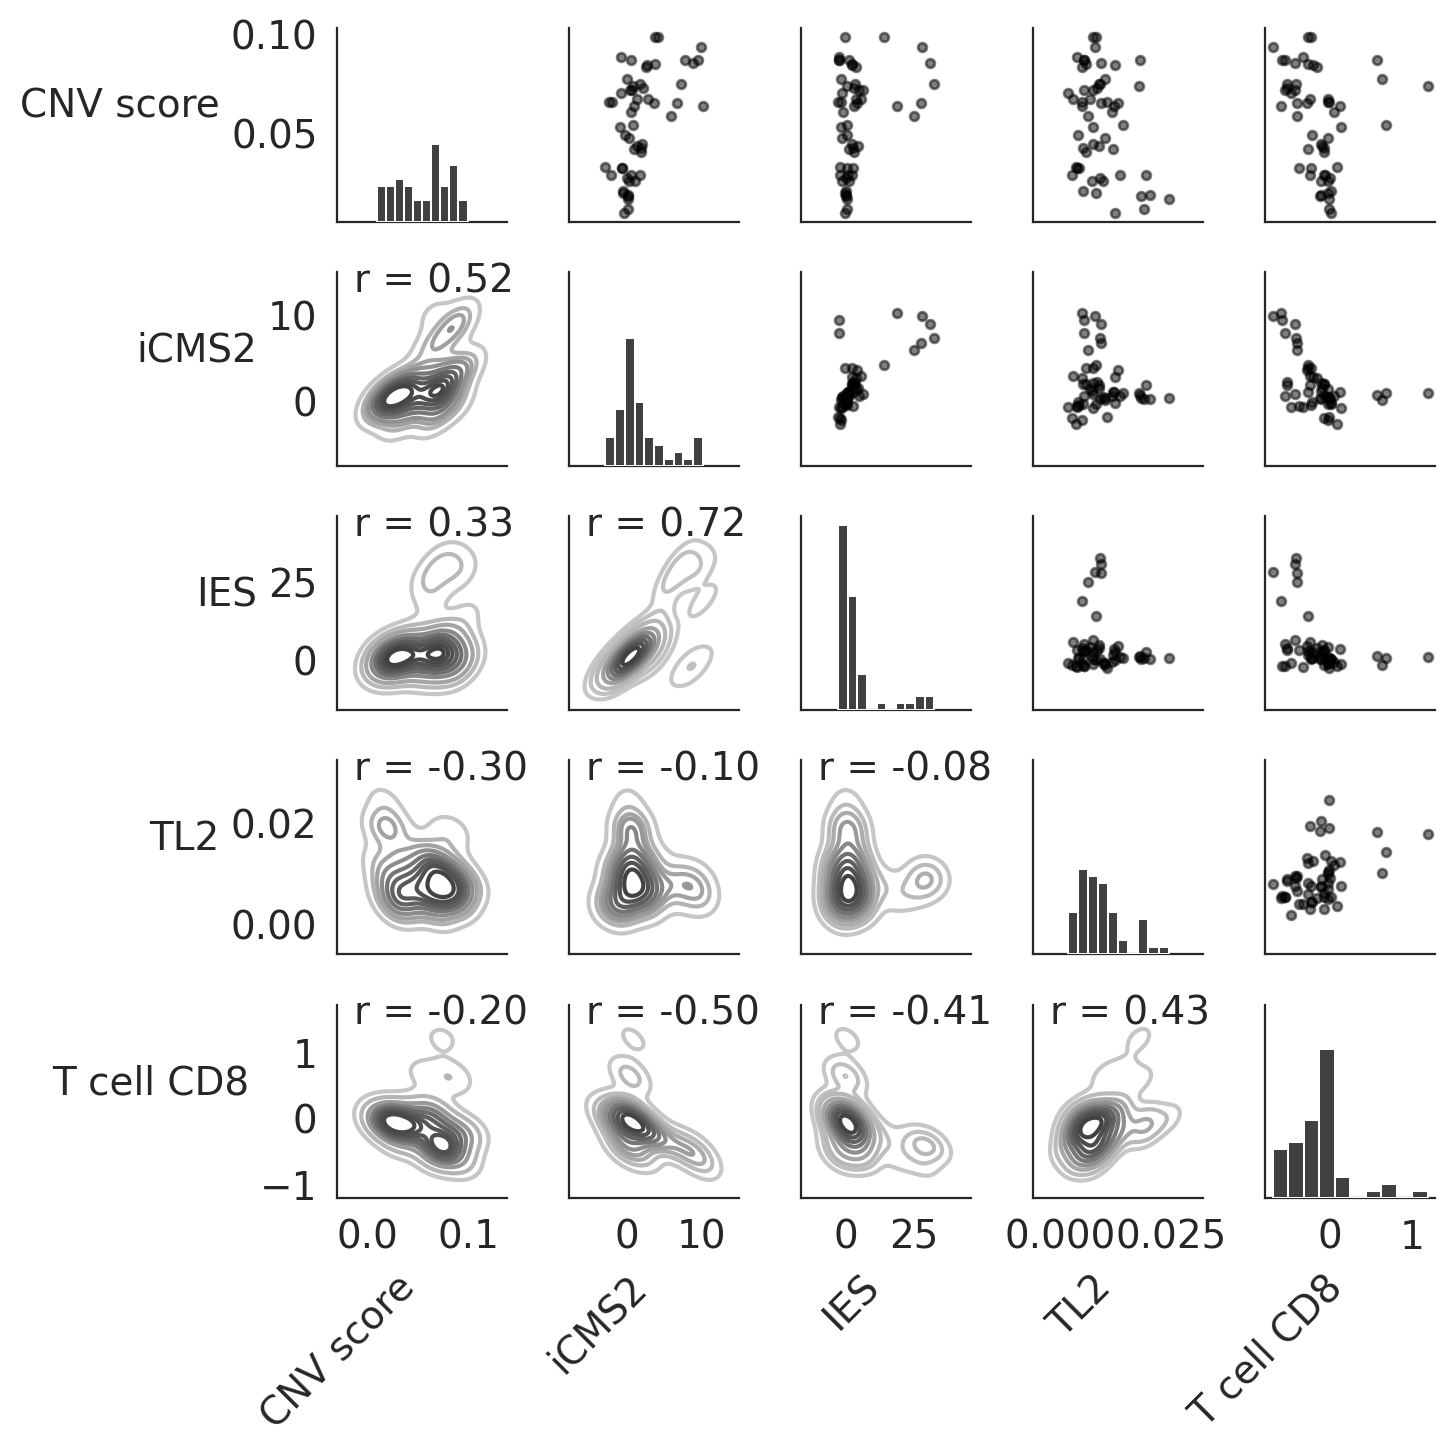

In [241]:
g = sns.PairGrid(CIN_df, palette=["Greys"], height=1.5)
g.map_upper(plt.scatter, s=10, alpha=0.5, color="k")
g.map_diag(sns.histplot, bins=10, color="k")
g.map_lower(sns.kdeplot, cmap="Greys_d")
g.map_lower(corrfunc)
for ax in g.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 45)
    # set x labels alignment
    ax.xaxis.get_label().set_horizontalalignment('right')
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation = 0)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')
plt.tight_layout()
plt.savefig("plots_overview/immexcl_vs_imminf_PTregression.png")

---

In [242]:
HM_df = a_comb.obs.loc[
    a_comb.obs["CNV_LCM"].isin(custom_df.loc[custom_df["CIN status"].isin(["HM","SSL/HP"]), "CNV_LCM"].unique()),
    ["CNV_LCM","TMB","iCMS3","FIB3","MYE2","T cell CD8"]
].groupby("CNV_LCM").mean()

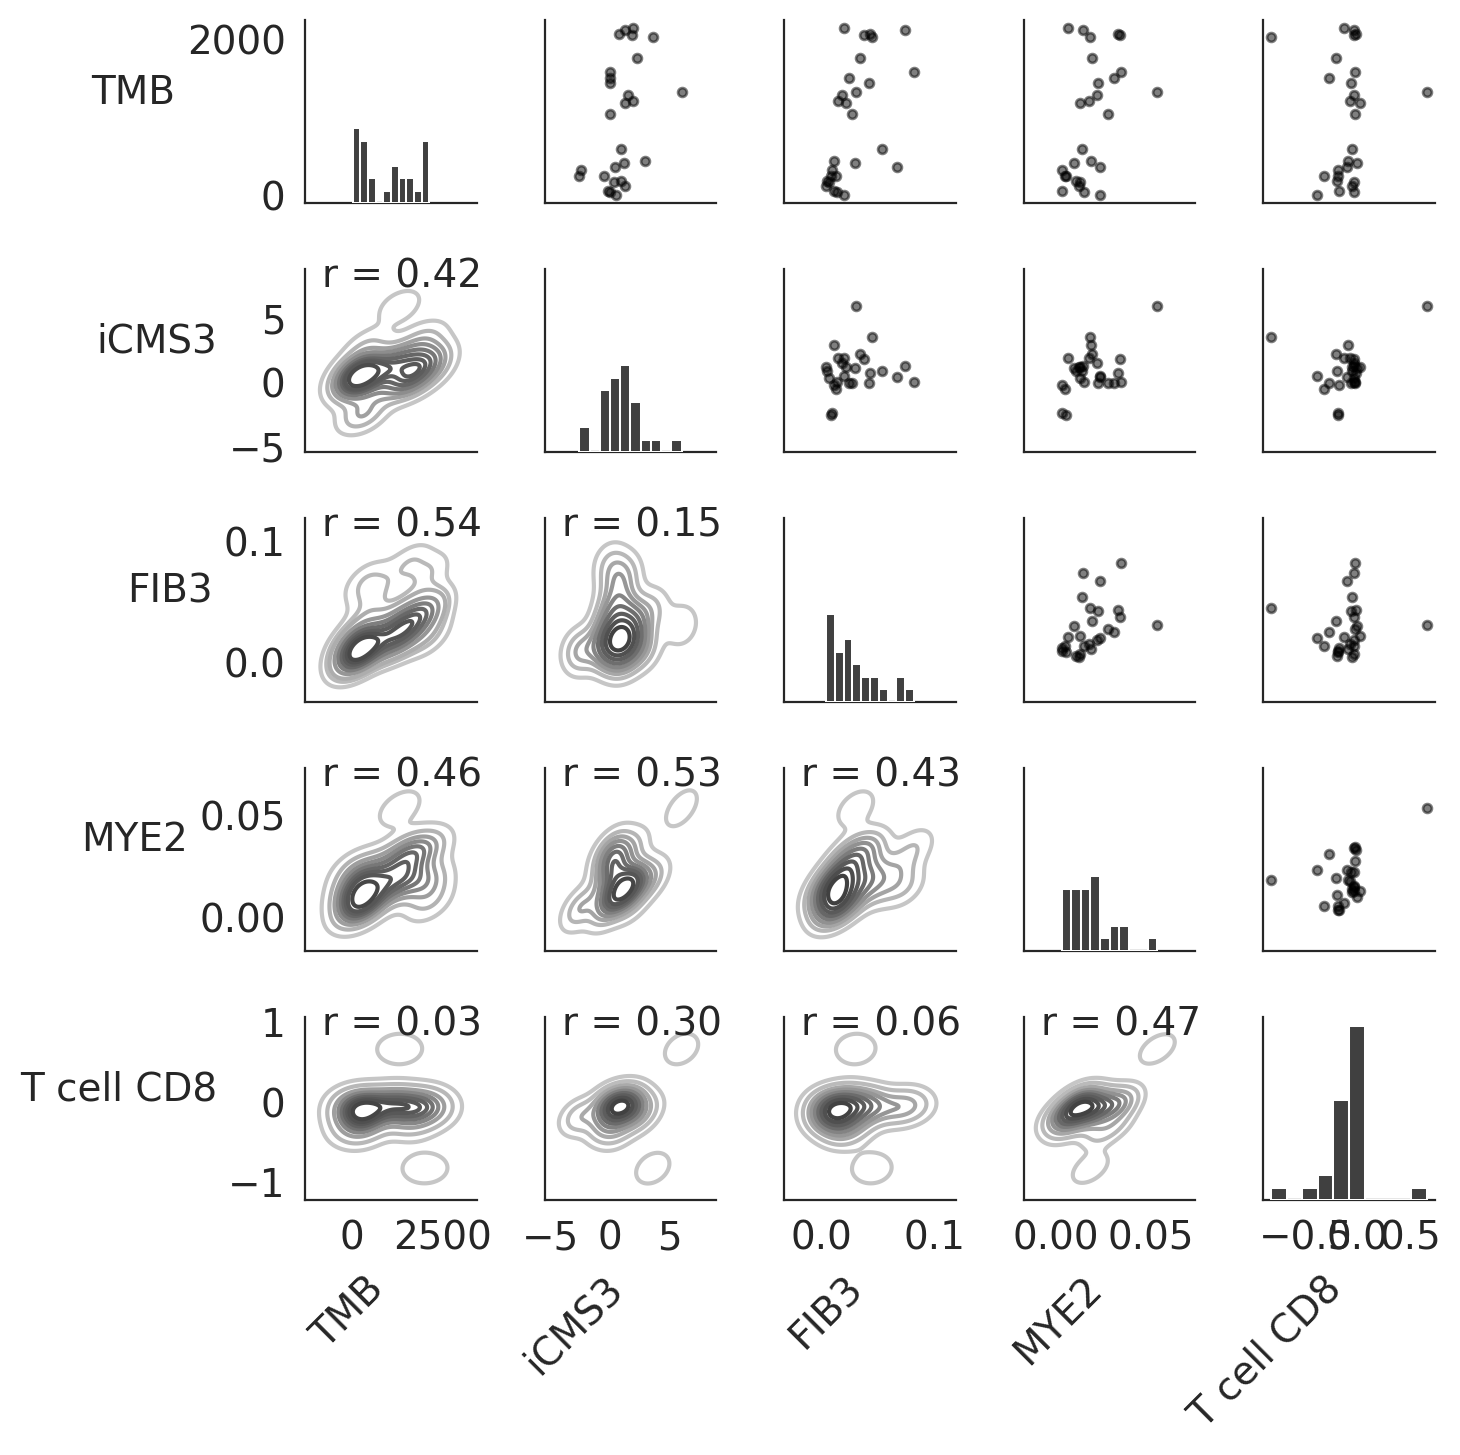

In [243]:
g = sns.PairGrid(HM_df, palette=["Greys"], height=1.5)
g.map_upper(plt.scatter, s=10, alpha=0.5, color="k")
g.map_diag(sns.histplot, bins=10, color="k")
g.map_lower(sns.kdeplot, cmap="Greys_d")
g.map_lower(corrfunc)
for ax in g.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 45)
    # set x labels alignment
    ax.xaxis.get_label().set_horizontalalignment('right')
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation = 0)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')
plt.tight_layout()
plt.savefig("plots_overview/immexcl_HM_PTregression.png")

---
# Prep for traDE-seq

In [244]:
from sklearn.preprocessing import MinMaxScaler

def generate_pt_df(adata, columns, pt_order, pt_column="CNV_LCM"):
    df = adata.obs.loc[a_comb.obs[pt_column].isin(pt_order), [pt_column] + columns].copy()
    scaler = MinMaxScaler()
    df[columns] = scaler.fit_transform(df[columns])
    df["Pseudotime"] = df[pt_column].replace(dict(zip(pt_order, range(len(pt_order)))))
    return df

In [245]:
sns.set_theme(style="ticks")
from matplotlib.lines import Line2D

def pt_plot(df, stat="frequency", figsize=(7,3), cmap="tab10", bw_adjust=1.5, save=None, dpi=400, ylim=35, show_bars=False, **kwargs):
    f, ax = plt.subplots(figsize=figsize)
    sns.despine(f)
    sns.histplot(
        data=df.melt(id_vars=["Pseudotime","CNV_LCM"]),
        x="Pseudotime",
        hue="variable",
        weights="value",
        stat=stat,
        multiple="layer",
        palette=cmap,
        bins=len(df.CNV_LCM.unique()),
        kde=True,
        alpha=0.2 if show_bars else 0,
        kde_kws={"bw_adjust":bw_adjust},
        line_kws={"lw":4,"alpha":0.8},
        legend=False,
        **kwargs,
    )
    plt.ylim([0,ylim])
    plt.xlim([-1, len(df.CNV_LCM.unique()) + 1])
    plt.ylabel("Weighted Frequency")
    custom_lines = [Line2D([0], [0], color=sns.color_palette(cmap)[x], lw=4, alpha=0.8) for x in range(len(df.melt(id_vars=["Pseudotime","CNV_LCM"]).variable.unique()))]
    ax.legend(
        custom_lines,
        list(df.melt(id_vars=["Pseudotime","CNV_LCM"]).variable.unique()),
        loc="upper center",
        bbox_to_anchor=(0.5, 1.2),
        ncol=len(df.melt(id_vars=["Pseudotime","CNV_LCM"]).variable.unique()),
        frameon=False,
    )
    plt.tick_params(bottom = False, labelbottom=False)
    ax.plot((len(df.CNV_LCM.unique()) + 0.75), (0), ls="", marker=">", ms=8, color="k", transform=ax.get_xaxis_transform(), clip_on=False)
    if save:
        plt.tight_layout()
        plt.savefig(save, dpi=dpi)

---

In [246]:
AD_CIN_order = custom_df.loc[custom_df["CIN status"].isin(["CIN+","NL","TA/TVA"]), "CNV_LCM"].values

In [247]:
CIN_df = generate_pt_df(
    a_comb,
    columns=["iCMS2","IES","Fibrosis","CRC2","CT","ABS","GOB"],
    pt_order=AD_CIN_order,
    pt_column="CNV_LCM",
)

In [248]:
CIN_df.Pseudotime.max()

53

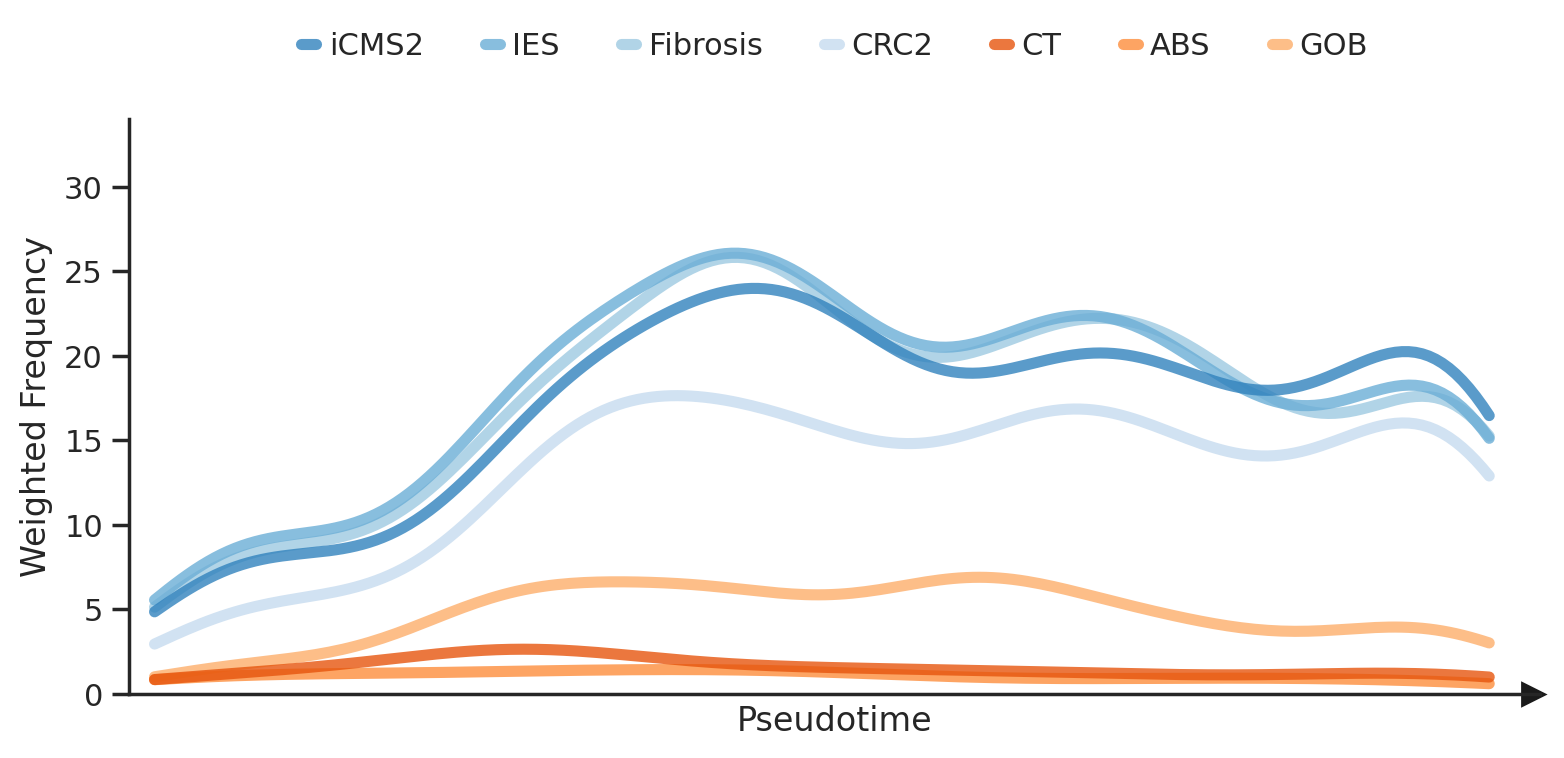

In [249]:
pt_plot(
    CIN_df,
    figsize=(8,4),
    cmap="tab20c",
    bw_adjust=1.8,
    save="test_PPT_regression_fits_09Feb23.png",
    dpi=400,
    ylim=34,
)

In [250]:
CIN_df = generate_pt_df(
    a_comb,
    columns=["CNV score","TMB"],
    pt_order=AD_CIN_order,
    pt_column="CNV_LCM",
)

In [251]:
CIN_df.Pseudotime = CIN_df["CNV score"].copy()
CIN_df["CIN"] = 1
CIN_df["HM"] = 0

---

In [252]:
SER_HM_order = custom_df.loc[custom_df["CIN status"].isin(["HM","SSL/HP"]), "CNV_LCM"].values

In [253]:
HM_df = generate_pt_df(
    a_comb,
    columns=["CNV score","TMB"],
    pt_order=SER_HM_order,
    pt_column="CNV_LCM",
)

In [254]:
HM_df.Pseudotime = HM_df["TMB"].copy()
HM_df["HM"] = 1
HM_df["CIN"] = 0

In [255]:
tradeseq_df = pd.concat([CIN_df,HM_df])

In [256]:
tradeseq_df

CNV_LCM  CNV score       TMB  \
AAACAAGTATCTCCCA-1-8578_4_SR00001       SR00001 2   0.230085  0.000000   
AAACAGGGTCTATATT-1-8578_4_SR00001       SR00001 2   0.230085  0.000000   
AAACCCGAACGAAATC-1-8578_4_SR00001       SR00001 2   0.230085  0.000000   
AAACCGTTCGTCCAGG-1-8578_4_SR00001       SR00001 1   0.199225  0.000000   
AAACGCTGGGCACGAC-1-8578_4_SR00001       SR00001 2   0.230085  0.000000   
...                                           ...        ...       ...   
TTGGACATGTGGCTTA-1-8899_4_SG00002  SG00002 ROI4 1   0.758397  0.944079   
TTGGGACACTGCCCGC-1-8899_4_SG00002  SG00002 ROI4 1   0.758397  0.944079   
TTGGGCGGCGGTTGCC-1-8899_4_SG00002  SG00002 ROI4 1   0.758397  0.944079   
TTGTAATCCGTACTCG-1-8899_4_SG00002  SG00002 ROI4 1   0.758397  0.944079   
TTGTTGTGTGTCAAGA-1-8899_4_SG00002  SG00002 ROI4 1   0.758397  0.944079   

                                   Pseudotime  CIN  HM  
AAACAAGTATCTCCCA-1-8578_4_SR00001    0.230085    1   0  
AAACAGGGTCTATATT-1-8578_4_SR00001    0.230085    1   0  
AAACCCGAACGAAATC-1-8578_4_SR00001    0.230085    1   0  
AAACCGTTCGTCCAGG-1-8578_4_SR00001    0.199225    1   0  
AAACGCTGGGCACGAC-1-8578_4_SR00001    0.230085    1   0  
...                                       ...  ...  ..  
TTGGACATGTGGCTTA-1-8899_4_SG00002    0.944079    0   1  
TTGGGACACTGCCCGC-1-8899_4_SG00002    0.944079    0   1  
TTGGGCGGCGGTTGCC-1-8899_4_SG00002    0.944079    0   1  
TTGTAATCCGTACTCG-1-8899_4_SG00002    0.944079    0   1  
TTGTTGTGTGTCAAGA-1-8899_4_SG00002    0.944079    0   1  

[28650 rows x 6 columns]

In [257]:
tradeseq_df.to_csv("tradeseq/tradeseq_09Feb23.csv")

---
### Regular genes first

In [258]:
a_tradeseq = a_comb[a_comb.obs.CNV_LCM.isin(custom_df.CNV_LCM),:].copy(); a_tradeseq

AnnData object with n_obs × n_vars = 28650 × 19469
    obs: 'in_tissue', 'array_row', 'array_col', 'Sample', 'Patient', 'Block ID', 'Tumor Type', 'Tumor Location', 'Gender', 'Ethnicity', 'pathology_annotation', 'CytoTRACE', 'A1_Innate', 'A2_Cytotoxic', 'A3_Endocrine', 'A4_MUC', 'A5_ABS', 'A6_SM', 'A7_Adaptive', 'A8_Stem', 'Tumor Stage', 'Tumor Grade', 'cnv_leiden', 'CNV score', 'CNV clone', 'Cytotoxicity', 'Exhaustion', 'Cytokines', 'Chemokines', 'MHC', 'Fetal', 'Stem', 'Metaplasia', 'Bacterial response', 'iCMS2_Up', 'iCMS2_Down', 'iCMS3_Up', 'iCMS3_Down', 'Proliferation', 'Translation', 'Neutrophils', 'RSC', 'CBC', 'T cell exhaustion', 'B cell', 'NK cell', 'Plasma cell', 'T reg resting', 'T reg suppressive', 'T reg tissue homing', 'T reg cytokines', 'T reg activation', 'TH1', 'TH2', 'TH17', 'TRM', 'M1', 'M2', 'Costimulatory MYE', 'Stimulatory DCs', 'IFN stimulated MYE', 'EMT', 'Senescence', 'SASP', 'IFN stimulated EPI', 'Stress response', 'Fibrosis', 'T cell', 'Myeloid', 'Stroma', 'T 

In [259]:
%%time
a_tradeseq.layers["raw_counts"] = a_tradeseq.X.copy()
sc.pp.normalize_total(a_tradeseq)
sc.pp.log1p(a_tradeseq)
sc.pp.scale(a_tradeseq)

CPU times: user 6.91 s, sys: 9.72 s, total: 16.6 s
Wall time: 17.3 s


In [260]:
sc.pp.highly_variable_genes(a_tradeseq, n_top_genes=10000)

In [261]:
np.array(a_tradeseq.layers["raw_counts"].sum(axis=0)).squeeze()

array([   394.,   9792.,  54431., ...,  14770., 191359.,  58680.])

In [262]:
a_tradeseq.var["total_counts"] = np.array(a_tradeseq.layers["raw_counts"].sum(axis=0)).squeeze()

In [263]:
a_tradeseq.var.loc[["DDR1","DPEP1","PAK4","TGFBI"]]

mean       std  highly_variable     means  dispersions  \
DDR1   1.837770  0.699925            False  0.408234     1.487000   
DPEP1  1.646506  1.410271            False  0.440676     1.095879   
PAK4   1.004134  0.665512            False  0.464719     1.809756   
TGFBI  2.118499  0.997474            False  0.427812     1.342892   

       dispersions_norm  total_counts  
DDR1          -1.023182      223380.0  
DPEP1         -1.114938      407566.0  
PAK4          -0.947464       85656.0  
TGFBI         -1.056989      531742.0

In [264]:
a_tradeseq.X = a_tradeseq.layers["raw_counts"].copy()

In [265]:
a_tradeseq[:, a_tradeseq.var.total_counts > 80000].to_df().to_csv("tradeseq/tradeseq_counts_09Feb23.csv")

---
### Now gene signatures and cell states

In [266]:
a_tradeseq = a_comb[tradeseq_df.index,:].copy()

In [267]:
columns = [
    'CytoTRACE','Cytotoxicity','Exhaustion','Cytokines','Chemokines','MHC','Fetal','Stem','Metaplasia',
    'Bacterial response','Proliferation','Translation','Neutrophils','RSC','CBC','T cell exhaustion',
    'B cell','NK cell','Plasma cell','T reg resting','T reg suppressive','T reg tissue homing','T reg cytokines',
    'T reg activation','TH1','TH2','TH17','TRM','M1','M2','Costimulatory MYE','Stimulatory DCs',
    'IFN stimulated MYE','Senescence','SASP','IFN stimulated EPI','Stress response','Fibrosis',
    'T cell','Myeloid','Stroma','T reg','T cell CD4','T cell CD8','cDC2','cDC1','Macrophage','Classical monocytes',
    'Cycle','Stress','Interferon','Hypoxia','Oxphos','Metal','Mesenchymal','pEMT','Alveolar','Basal','Squamous',
    'iCMS2','iCMS3','IES',
    'STM','END1','BL1','FIB1','CRC1','MYE1','TL1','MYE2','CRC2','CT','SSC','CRC3','EE1','MYE3','PLA','FIB2',
    'MYE4','GOB','MAS','MYE5','CRC4','ABS','TUF','FIB3','FIB4','TL2','END2','TL3','EE2','BL2',
    #'LYSOZYME','CD20','MUC5AC','CD11B','CD45','FOXP3','CD8','CD3D','SOX9','CGA','DPEP1','PEGFR','NAKATPASE',
    #'AQP5','HLAA','PSTAT3','PCNA','CD4','CD68','CEACAM5','CDX2','COLLAGEN','OLFM4','VIMENTIN','PANCK','SMA',
    #'CD27','GAMMAACTIN','BCATENIN','MUC2','ERBB2','COX2'
]

scaler = MinMaxScaler()
a_tradeseq = sc.AnnData(
    scaler.fit_transform(a_tradeseq.obs[columns]),
    obs = a_tradeseq.obs[['Sample', 'Patient', 'Block ID', 'Tumor Type']],
)

a_tradeseq.var_names = columns

a_tradeseq

AnnData object with n_obs × n_vars = 28650 × 92
    obs: 'Sample', 'Patient', 'Block ID', 'Tumor Type'

In [268]:
a_tradeseq.X

array([[0.72159785, 0.48125288, 0.39059886, ..., 0.00306701, 0.        ,
        0.        ],
       [0.8004062 , 0.48273197, 0.36119077, ..., 0.        , 0.        ,
        0.        ],
       [0.9412322 , 0.4883017 , 0.36010158, ..., 0.        , 0.06174494,
        0.        ],
       ...,
       [0.9715714 , 0.4816389 , 0.35792318, ..., 0.        , 0.        ,
        0.        ],
       [0.88722277, 0.47979742, 0.35247725, ..., 0.        , 0.        ,
        0.        ],
       [0.83348954, 0.4890969 , 0.38950968, ..., 0.02486207, 0.        ,
        0.00478329]], dtype=float32)

In [269]:
a_tradeseq.to_df().to_csv("tradeseq/tradeseq_signatures_cellstates_09Feb23.csv")